In [1]:
import pandas as pd

papers = pd.read_csv('./data_test/vnexpress-thoisu-ner1.csv')
# convert type of column
papers.rename(columns={'doc_ner': 'paper_text'}, inplace=True)
papers['paper_text'].astype(str)
# Print head
# print(papers.head())
# print(papers.shape)
print(papers['paper_text'][0])
print(papers['location'][0])
print(papers['person'][0])
print(papers['organization'][0])

Mỏ cát được giao nằm trên sông Tiền thuộc xã An Nhơn, huyện_châu_thành. Đơn vị tiếp nhận là Tổng Công ty xây dựng số 1 - CTCP - nhà thầu thi công dự án thành phần đoạn Cần Thơ - Hậu Giang và Hậu Giang - Cà Mau, thuộc dự án cao_tốc_bắc_nam_phía_đông. Đồng Tháp được giao cung ứng 10,3 triệu m3 trong năm nay và 2024 cho dự án cao_tốc_cần_thơ_cà_mau, trên tổng số 18,1 triệu m3 công trình này cần. Số cát còn lại Chính phủ giao An Giang và vĩnh_long chịu trách nhiệm cung ứng, song hai địa phương này chưa bàn giao. cao_tốc_cần_thơ_cà_mau dài 110 km, các tuyến nối khoảng 25 km, rộng 17 m, 4 làn, tổng vốn đầu tư hơn 27.200 tỷ đồng khởi công tháng 1/2023. Công trình được xem là tuyến quan trọng nhất đồng_bằng_sông_cửu_long khi kết nối nhiều tỉnh thành với 128 cây cầu. ngọc_tài
['huyện Châu Thành', 'cao tốc Bắc Nam phía Đông', 'cao tốc Cần Thơ Cà Mau', 'Vĩnh Long', 'Cao tốc Cần Thơ Cà Mau', 'Đồng bằng sông Cửu Long']
['Ngọc Tài']
[]


In [2]:
import numpy as np
# duplicated
print(papers.duplicated().sum())
papers.drop_duplicates(inplace=True)

# drop nan
papers.dropna(axis=0, inplace=True, how="any")
# drop inf
papers.replace([np.inf, -np.inf], np.nan, inplace=True)
papers.replace('', np.nan, inplace=True)
papers.dropna(inplace=True,how='any',axis=0)
# Remove the columns
try:
    papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], axis=1).sample(100)
except:
    pass

# Print out the first rows of papers
print(papers.head())
print(papers.info())
papers.reset_index(inplace=True, drop=True)

0
                                               title  \
0  Cao tốc Cần Thơ - Cà Mau có thêm nửa triệu m3 ...   
1  Thủ tướng trao Huân chương Hữu nghị cho bà Aur...   
2  Phà chở 15.000 lượt người mỗi ngày ở miền Tây ...   
3  Giám đốc Công an Hà Nội: Loại nhà nào cũng phả...   
4          Hàng loạt cây rừng bị đầu độc - VnExpress   

                                                body  \
0  Đây là tỉnh đầu tiên bàn giao mỏ cát cho nhà t...   
1  Lãnh đạo Chính phủ Việt Nam trao huân chương c...   
2  Công văn yêu cầu chấm dứt hoạt động bến phà An...   
3  Chiều 20/9, tại cuộc tiếp xúc cử tri quận Tây ...   
4  Ban quản lý rừng phòng hộ đầu nguồn liên hồ Sô...   

                                  date  \
0   Thứ tư, 20/9/2023, 18:49 (GMT+7)\n   
1  Thứ năm, 21/9/2023, 01:29 (GMT+7)\n   
2  Thứ năm, 21/9/2023, 00:00 (GMT+7)\n   
3   Thứ tư, 20/9/2023, 22:11 (GMT+7)\n   
4   Thứ tư, 20/9/2023, 19:04 (GMT+7)\n   

                                            location  \
0  ['huyện Châu

In [3]:
# get timestamps
timestamps = papers.date.to_list()

In [4]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))
# replace \n
papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: re.sub('\n', ' ', x))
# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'][0]

'mỏ cát được giao nằm trên sông tiền thuộc xã an nhơn huyện_châu_thành đơn vị tiếp nhận là tổng công ty xây dựng số 1 - ctcp - nhà thầu thi công dự án thành phần đoạn cần thơ - hậu giang và hậu giang - cà mau thuộc dự án cao_tốc_bắc_nam_phía_đông đồng tháp được giao cung ứng 103 triệu m3 trong năm nay và 2024 cho dự án cao_tốc_cần_thơ_cà_mau trên tổng số 181 triệu m3 công trình này cần số cát còn lại chính phủ giao an giang và vĩnh_long chịu trách nhiệm cung ứng song hai địa phương này chưa bàn giao cao_tốc_cần_thơ_cà_mau dài 110 km các tuyến nối khoảng 25 km rộng 17 m 4 làn tổng vốn đầu tư hơn 27200 tỷ đồng khởi công tháng 1/2023 công trình được xem là tuyến quan trọng nhất đồng_bằng_sông_cửu_long khi kết nối nhiều tỉnh thành với 128 cây cầu ngọc_tài'

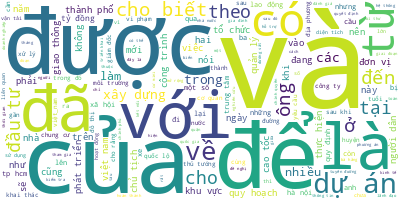

In [5]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [6]:

import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from unidecode import unidecode
import string
import re
import pyvi
from pyvi import ViTokenizer, ViPosTagger
from underthesea import word_tokenize
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])
stop_words = set(open("./data_test/vietnamese-stopwords-dash.txt", "r", encoding="utf-8").read().splitlines())

def remove_whitespace(text):
    return re.sub(r'\s+', ' ', text).strip()

def remove_number(text):
    return re.sub(r'\d+', '', text).strip()

def remove_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

def remove_punctuation_not_underscore(text): # remove dấu câu để lại dấu _
    # Tạo một bản sao của string.punctuation và loại bỏ dấu _
    punctuation = string.punctuation.replace("_", "")
    # punctuation = punctuation.replace("-", "")
    return text.translate(str.maketrans('', '', punctuation))

def remove_(text):
    text = remove_punctuation_not_underscore(text)
    text = remove_number(text)
    text = re.sub(r'[\x00-\x1F\x7F-\x9F]', '', text)
    text = text.replace("_  _", "_")
    return re.sub(r'“|”', '', text).strip()
    # return ''.join(char for char in text if char not in ['“', '”'])

def remove_punctuation_underscore(text): # remove dấu _
    punctuation = "_"
    return text.translate(str.maketrans('', '', punctuation))
    
def word_to_phrase(text): # chuyển từ thành cụm từ
    # return ViTokenizer.tokenize(text)
    return word_tokenize(text, format="text")

# def sent_to_words(sentences):
#     for sentence in sentences:
#         # deacc=True removes punctuations
#         # loại bỏ dấu câu and split
#         yield([remove_(str(word)) for word in re.findall(r'\w+|\S+', word_to_phrase(str(sentence))) if remove_(str(word)) != ''])

def remove_stopwords(texts):
    words = [word for word in texts.split() if word not in stop_words]
    words_to_sentence = ' '.join(words)
    return words_to_sentence.strip()

data = papers['paper_text_processed']
data = data.apply(lambda x: remove_whitespace(x))
data = data.apply(lambda x: remove_number(x))
# data = data.apply(lambda x: remove_punctuation_underscore(x))
data = data.apply(lambda x: word_to_phrase(x))
data = data.apply(lambda x: remove_(x))
data = data.apply(lambda x: remove_stopwords(x))
text = data[0]
print(text)
# print(remove_stopwords(text))
docs = data.tolist()

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/minhthuy/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/minhthuy/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


mỏ cát giao nằm sông tiền xã an_nhơn huyện_châu_thành tiếp_nhận tổng_công_ty xây_dựng ctcp nhà_thầu thi_công dự_án thành_phần đoạn cần_thơ hậu_giang hậu_giang cà_mau dự_án cao_tốc_bắc_nam_phía_đông đồng_tháp giao cung_ứng triệu m dự_án cao_tốc_cần_thơ_cà_mau tổng_số triệu m công_trình cát chính_phủ giao an_giang vĩnh_long trách_nhiệm cung_ứng song hai địa_phương bàn_giao cao_tốc_cần_thơ_cà_mau km tuyến nối km rộng m làn tổng vốn đầu_tư tỷ đồng khởi_công công_trình tuyến đồng_bằng_sông_cửu_long kết_nối tỉnh_thành cầu ngọc_tài


### Training model with bertopic
#### Parameters
##### BERTopic

- language: Ngôn ngữ, ở đây là vietnamese
- top_n_words: số lượng từ được sử dụng để mô tả mỗi chủ đề
- n_gram_range: số lượng từ trong một n-gram
- min_topic_size: số lượng tài liệu tối thiểu trong mỗi chủ đề
- nr_topics: số lượng topic cần phát hiện. Nếu không được chỉ định, BERTopic sẽ tìm kiếm tất cả các chủ đề có thể có. Nếu Bertopic tìm thấy 100 chủ đề mà nr_topics=10 thì nó sẽ cố gắng đưa về 10 chủ đề.
- low_memory: sử dụng low memory mode để sử dụng ít bộ nhớ hơn
- calculate_probabilities: tính xác suất của từng từ trong topic
##### UMAP: 
UMAP là một kỹ thuật tuyệt vời để giảm kích thước. Trong BERTopic, nó được sử dụng để giảm tính chiều của việc nhúng tài liệu vào thứ gì đó dễ sử dụng hơn với HDBSCAN để tạo các cụm tốt. Tuy nhiên, nó có một số lượng đáng kể các tham số mà bạn có thể tính đến. Vì việc hiển thị tất cả các tham số trong BERTopic sẽ khó quản lý nên chúng ta có thể khởi tạo mô hình UMAP của mình và chuyển nó sang BERTopic:
```md
from umap import UMAP

umap_model = UMAP(n_neighbors=15, n_components=10, metric='cosine', low_memory=False)
topic_model = BERTopic(umap_model=umap_model).fit(docs)
```
- n_neighbors: 
- n_components: số chiều của embedding vector sau khi giảm chiều bằng UMAP
- metric: độ đo khoảng cách giữa các điểm dữ liệu trong không gian vector embedding (có thể là cosine, euclidean, manhattan, chebyshev, minkowski, canberra, braycurtis, mahalanobis, wminkowski, seuclidean, cosine, correlation, haversine, hamming, jaccard, dice, russellrao, kulsinski, rogerstanimoto, sokalmichener, sokalsneath, yule, or matching)
- low_memory: low_memory được sử dụng khi tập dữ liệu có thể tiêu tốn nhiều bộ nhớ. Việc sử dụng hàng triệu tài liệu có thể dẫn đến các vấn đề về bộ nhớ và việc đặt giá trị này thành True có thể giảm bớt tiêu hao bộ nhớ.

##### HDBSCAN
Sau khi giảm số chiều của embedding vector, Chúng tôi sử dụng HDBSCAN để phân cụm các tập docs thành các cụm tài liệu tương tự nhau. Tương tự như UMAP, HDBSCAN có nhiều tham số để tuỳ chỉnh:
```md
from hdbscan import HDBSCAN

hdbscan_model = HDBSCAN(min_cluster_size=10, metric='euclidean', prediction_data=True)
topic_model = BERTopic(hdbscan_model=hdbscan_model).fit(docs)
```
- min_cluster_size: số lượng tài liệu tối thiểu trong mỗi cụm
- min_samples: số lượng tài liệu tối thiểu trong mỗi cụm
- metric: được sử dụng để tính khoảng cách. Ở đây, chúng tôi đã sử dụng euclide vì sau khi giảm kích thước, chúng tôi có dữ liệu có chiều nhỏ và không cần tối ưu hóa nhiều. Tuy nhiên, nếu tăng n_comComponents trong UMAP thì nên xem xét các số liệu hoạt động với dữ liệu nhiều chiều.
- prediction_data: nếu True thì sẽ trả về các điểm dữ liệu được dự đoán cho mỗi cụm. Điều này có thể được sử dụng để phân tích các cụm và xác định các điểm nhiễu.


In [7]:
from umap import UMAP
from hdbscan import HDBSCAN
from bertopic import BERTopic
from sentence_transformers import SentenceTransformer
from sklearn.feature_extraction.text import CountVectorizer
from bertopic.representation import KeyBERTInspired
from bertopic.vectorizers import ClassTfidfTransformer
from bertopic.vectorizers import OnlineCountVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import IncrementalPCA
# Step 1 - Extract embeddings
embedding_model = SentenceTransformer("keepitreal/vietnamese-sbert")
# Step 2 - Reduce dimensionality
# umap_model = UMAP(n_neighbors=15, n_components=5, min_dist=0.0, metric='cosine')
umap_model = IncrementalPCA(n_components=5)
# Step 3 - Cluster reduced embeddings
# hdbscan_model = HDBSCAN(min_cluster_size=15, metric='euclidean', cluster_selection_method='eom', prediction_data=True)
hdbscan_model = MiniBatchKMeans(n_clusters=10, random_state=0)
# Step 4 - Tokenize topics
stop_words = list(stop_words)
vectorizer_model = OnlineCountVectorizer(stop_words=stop_words)
# vectorizer_model = CountVectorizer(stop_words=stop_words)
# Step 5 - Create topic representation
ctfidf_model = ClassTfidfTransformer()
# Step 6 - (Optional) Fine-tune topic representations with 
# a `bertopic.representation` model
representation_model = KeyBERTInspired()

nr_topics = 10
top_n_words = 10
topic_model = BERTopic(
  embedding_model=embedding_model,          # Step 1 - Extract embeddings
  umap_model=umap_model,                    # Step 2 - Reduce dimensionality
  hdbscan_model=hdbscan_model,              # Step 3 - Cluster reduced embeddings
  vectorizer_model=vectorizer_model,        # Step 4 - Tokenize topics
  ctfidf_model=ctfidf_model,                # Step 5 - Extract topic words
  representation_model=representation_model, # Step 6 - (Optional) Fine-tune topic represenations
  language="vietnamese", calculate_probabilities=True, verbose=True, nr_topics=nr_topics, top_n_words=top_n_words
)
topic_model = topic_model.partial_fit(docs)

/home/minhthuy/anaconda3/envs/bertopic/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Batches: 100%|██████████| 19/19 [00:10<00:00,  1.89it/s]
2023-11-10 08:54:59,114 - BERTopic - Reduced dimensionality
2023-11-10 08:54:59,229 - BERTopic - Clustered reduced embeddings


In [8]:
documents = topic_model.get_document_info(data)
documents_per_topic = documents.sort_values("Topic").groupby(['Topic'], as_index=False)
updated_topics = documents_per_topic.first().Topic.astype(int)
documents_per_topic = documents_per_topic.agg({'Document': ' '.join})
c_tf_idf,words = topic_model._c_tf_idf(documents_per_topic, partial_fit=False)
print(c_tf_idf)

# c_tf_idf = c_tf_idf.toarray()
# col=8267
# print(f'c_tf_idf of {col}: ',c_tf_idf[0][col])
# df = pd.DataFrame(c_tf_idf, columns=words,dtype='float64')
# print('------------------')
# key = 'văn_hóa'
# print(f'c_tf_idf of {key}:')
# print(df[key])
# # sort
# t = 9
# df = df[df.iloc[t].sort_values(ascending=False).index]

# print(df.iloc[t][0:10])
# print(df.iloc[t][0:10].index)
# print(topic_model.get_topic(t))
# _extract_words_per_topic

  (0, 11051)	0.006416285959362124
  (0, 11014)	0.002067369112379122
  (0, 10991)	0.003474692182406657
  (0, 10981)	0.002855861034773921
  (0, 10947)	0.002629972587210234
  (0, 10929)	0.002408999331766009
  (0, 10925)	0.0030522407224293467
  (0, 10922)	0.0026752279263062683
  (0, 10915)	0.0030522407224293467
  (0, 10908)	0.003208142979681062
  (0, 10897)	0.003474692182406657
  (0, 10896)	0.003474692182406657
  (0, 10894)	0.003474692182406657
  (0, 10892)	0.029359729748176373
  (0, 10890)	0.0030522407224293467
  (0, 10875)	0.003474692182406657
  (0, 10874)	0.008350101465208874
  (0, 10842)	0.008179620960940104
  (0, 10841)	0.016848748039351873
  (0, 10840)	0.0030522407224293467
  (0, 10825)	0.004879325246894247
  (0, 10810)	0.002629972587210234
  (0, 10788)	0.002629972587210234
  (0, 10786)	0.003208142979681062
  (0, 10778)	0.0025194630889048167
  :	:
  (9, 256)	0.0013620269184410822
  (9, 251)	0.001749997334530331
  (9, 249)	0.0015643403951716404
  (9, 245)	0.03242749358443851
  (9, 229

In [9]:
# from bertopic.representation import BaseRepresentation
# documents = topic_model.get_document_info(data)
# documents_per_topic = documents.sort_values("Topic").groupby(['Topic'], as_index=False)
# updated_topics = documents_per_topic.first().Topic.astype(int)
# documents_per_topic = documents_per_topic.agg({'Document': ' '.join})
# c_tf_idf,words = topic_model._c_tf_idf(documents_per_topic, partial_fit=False)
# # print(c_tf_idf)

# topics = topic_model.topics_
# documents = pd.DataFrame({"Document": docs, "Topic": topics, "ID": range(len(docs)), "Image": range(len(docs))})
# # topic_representations = topic_model._extract_words_per_topic(words, documents, c_tf_idf, False)
# # topic_representations

# labels = sorted(list(documents.Topic.unique()))
# labels = [int(label) for label in labels]

# top_n_words = 9170
# indices = topic_model._top_n_idx_sparse(c_tf_idf, n=top_n_words)
# scores = topic_model._top_n_values_sparse(c_tf_idf, indices)
# sorted_indices = np.argsort(scores)
# indices = np.take_along_axis(indices, sorted_indices, axis=1)
# scores = np.take_along_axis(scores, sorted_indices, axis=1)
# topics = {label: [(words[word_index], score)
#                           if word_index is not None and score > 0
#                           else ("", 0.00001)
#                           for word_index, score in zip(indices[index][::-1], scores[index][::-1])
#                           ]
#                   for index, label in enumerate(labels)}
# # print(topics[0])
# if isinstance(topic_model.representation_model, list):
#     print(1)
#     for tuner in topic_model.representation_model:
#         topics = tuner.extract_topics(topic_model, documents, c_tf_idf, topics)
# elif isinstance(topic_model.representation_model, BaseRepresentation):
#     print(2)
#     topics = topic_model.representation_model.extract_topics(topic_model, documents, c_tf_idf, topics)
    
# elif isinstance(topic_model.representation_model, dict):
#     print(3)
#     if topic_model.representation_model.get("Main"):
#         topics = topic_model.representation_model["Main"].extract_topics(topic_model, documents, c_tf_idf, topics)

# topics = {label: values[:top_n_words] for label, values in topics.items()}
# print(topics[1])
# print(topics[5])

In [10]:
topics = topic_model.topic_representations_
print(topics[1])
print(topics[5])

[('xúc_phạm', 0.30750132), ('công_ty_cổ_phần_đại_nam', 0.2999289), ('ca_sĩ', 0.26362446), ('lê_văn_thành', 0.24258333), ('viết', 0.23048517), ('phiên', 0.21105117), ('khu_vực', 0.19609304), ('ủy', 0.19270048), ('tham_gia', 0.18926196), ('thông_tin', 0.17974344)]
[('sâu', 0.28350624), ('mưa', 0.2484222), ('đổ', 0.23797205), ('thủy', 0.23617062), ('đám', 0.2290229), ('rộng', 0.20708838), ('trồng', 0.20512837), ('pháp_y', 0.20493683), ('xảy', 0.20413348), ('vụ', 0.20235598)]


In [11]:
print(timestamps)
import datetime
import re

timestamps = [re.sub(r'\s+', ' ', timestamp).strip() for timestamp in timestamps]
timestamps1 = [re.sub(r',','',time.split()[2]) for time in timestamps]
print(timestamps1)
timestamp_ = [datetime.datetime.strptime(timestamp, "%d/%m/%Y").date() for timestamp in timestamps1]
print(timestamp_)
timestamp_ = [str(time.year)+'-'+str(time.month)+'-'+str(time.day) for time in timestamp_]
print(timestamp_)

['Thứ tư, 20/9/2023, 18:49 (GMT+7)\n', 'Thứ năm, 21/9/2023, 01:29 (GMT+7)\n', 'Thứ năm, 21/9/2023, 00:00 (GMT+7)\n', 'Thứ tư, 20/9/2023, 22:11 (GMT+7)\n', 'Thứ tư, 20/9/2023, 19:04 (GMT+7)\n', 'Thứ tư, 20/9/2023, 17:02 (GMT+7)\n', 'Thứ năm, 21/9/2023, 08:00 (GMT+7)\n', 'Thứ tư, 13/9/2023, 17:00 (GMT+7)\n', 'Thứ hai, 11/9/2023, 14:00 (GMT+7)\n', 'Chủ nhật, 6/8/2023, 00:00 (GMT+7)\n', 'Thứ tư, 20/9/2023, 11:57 (GMT+7)\n', 'Thứ tư, 9/8/2023, 22:06 (GMT+7)\n', 'Thứ bảy, 2/9/2023, 00:00 (GMT+7)\n', 'Thứ ba, 8/8/2023, 13:43 (GMT+7)\n', 'Chủ nhật, 3/9/2023, 00:00 (GMT+7)\n', 'Thứ tư, 9/8/2023, 17:48 (GMT+7)\n', 'Thứ tư, 20/9/2023, 11:25 (GMT+7)\n', 'Thứ năm, 21/9/2023, 06:24 (GMT+7)\n', 'Thứ sáu, 1/9/2023, 00:00 (GMT+7)\n', 'Thứ tư, 20/9/2023, 16:46 (GMT+7)\n', 'Thứ tư, 20/9/2023, 16:25 (GMT+7)\n', 'Thứ tư, 20/9/2023, 16:10 (GMT+7)\n', 'Thứ tư, 20/9/2023, 15:03 (GMT+7)\n', 'Thứ tư, 20/9/2023, 14:08 (GMT+7)\n', 'Thứ tư, 20/9/2023, 13:26 (GMT+7)\n', 'Thứ tư, 20/9/2023, 12:45 (GMT+7)\n', 'Thứ tư

In [12]:
topics_over_time = topic_model.topics_over_time(docs, timestamp_, datetime_format="%Y-%m-%d", nr_bins=10)

1it [00:00,  7.00it/s]

8it [00:07,  1.06it/s]


In [13]:
topic_model.visualize_topics_over_time(topics_over_time)

In [14]:
d = pd.DataFrame({"Document": docs, "Topic": topic_model.topics_, "ID": range(len(docs)),'location':papers['location'],'date':papers['date'],'person':papers['person'],'organization':papers['organization'],'timestamp':timestamp_})
d.head(10)

,Document,Topic,ID,location,date,person,organization,timestamp
0,mỏ cát giao nằm sông tiền xã an_nhơn huyện_châ...,7,0,"['huyện Châu Thành', 'cao tốc Bắc Nam phía Đôn...","Thứ tư, 20/9/2023, 18:49 (GMT+7)\n",['Ngọc Tài'],[],2023-9-20
1,lãnh_đạo chính_phủ việt_nam trao huân_chương a...,1,1,"['Việt Nam', 'Việt Nam', 'Việt Nam', 'Việt Nam...","Thứ năm, 21/9/2023, 01:29 (GMT+7)\n","['Au ##ré ##lia Nguyễn', 'Au ##ré ##lia Nguyễn...",['Liên minh Sáng kiến Sẵn sàng Đối'],2023-9-21
2,công_văn chấm_dứt hoạt_động bến phà an_bình ph...,3,2,"['huyện Long Hồ', 'tỉnh Vĩnh Long', 'TP Vĩnh L...","Thứ năm, 21/9/2023, 00:00 (GMT+7)\n","['Sơn', 'Cửu Long']","['UBND TP Vĩnh Long', 'UBND tỉnh Vĩnh Long']",2023-9-21
3,chiều tiếp_xúc cử_tri tây_hồ kỳ họp quốc_hội k...,4,3,"['quận Thanh Xuân', 'TP HCM', 'Hà Nội', 'phườn...","Thứ tư, 20/9/2023, 22:11 (GMT+7)\n","['Trung', 'Trung', 'Nghiêm Quang Minh', 'Võ Hải']","['Công an Hà Nội', 'Thành ủy Hà Nội']",2023-9-20
4,ban quản_lý rừng_phòng_hộ đầu liên_hồ sông sắt...,5,4,"['xã Phước Đại', 'huyện Bác Ái']","Thứ tư, 20/9/2023, 19:04 (GMT+7)\n",['Việt Quốc'],['Sở Nông nghiệp và Phát triển nông thôn tỉnh ...,2023-9-20
5,công_trình thay_thế cầu cũ nằm đường rộng m là...,2,5,"['thành phố Nha Trang', 'cầu Trần Phú', 'TP Nh...","Thứ tư, 20/9/2023, 17:02 (GMT+7)\n",['Bùi Toàn'],[],2023-9-20
6,lễ trẻ_em đồng_văn hoạt_động đố vui thưởng gấu...,3,6,"['Đồng Văn', 'Đồng Văn', 'tỉnh Sơn La', 'Hà Gi...","Thứ năm, 21/9/2023, 08:00 (GMT+7)\n","['Minh', 'Minh', 'Giàng Ngọc Minh']","['trường PTDT BT Tiểu học Ma Lé', 'Enter ##oge...",2023-9-21
7,đại_diện quỹ hy_vọng nhãn hàng men ống vi_sinh...,3,7,"['huyện Đồng Văn', 'Đồng Văn', 'tỉnh Sơn La', ...","Thứ tư, 13/9/2023, 17:00 (GMT+7)\n",[],"['Phòng Giáo dục và Đào tạo huyện Đồng Văn', '...",2023-9-13
8,bác_sĩ nguyễn_trần nam_phó giám_đốc bệnh_viện ...,3,8,['TP HCM'],"Thứ hai, 11/9/2023, 14:00 (GMT+7)\n","['Nam', 'Nam', 'Chi Lê']",[],2023-9-11
9,mở_rộng quy_hoạch thủ_đô hà_nội mục_tiêu giãn ...,8,9,"['Hà Nội', 'Sóc Sơn', 'Mê Linh', 'Sóc Sơn', 's...","Chủ nhật, 6/8/2023, 00:00 (GMT+7)\n","['Nghiêm', 'Trần Ngọc Chính', 'Chính', 'Trịnh ...",['Ủy ban Thường vụ Quốc hội'],2023-8-6


In [15]:
print(words)
idx = np.where(words =='_mỹ_thuận')
idx

['_minh' '_mỹ_thuận' '_quân_khu_' ... 'ứng_viên' 'ứng_xử' 'ỷ_lại']


(array([1]),)

topic:  0
ôtô_tải 0.36020726
sum doc:  39
sum doc constains ôtô_tải:  4


4
------------------
chở 0.34937966
sum doc:  39
sum doc constains chở:  12
12
------------------
ngược_lại 0.34911096
sum doc:  39
sum doc constains ngược_lại:  5
5
------------------
topic:  1
xúc_phạm 0.30750132
sum doc:  140
sum doc constains xúc_phạm:  8
8
------------------
công_ty_cổ_phần_đại_nam 0.2999289
sum doc:  140
sum doc constains công_ty_cổ_phần_đại_nam:  8
8
------------------
ca_sĩ 0.26362446
sum doc:  140
sum doc constains ca_sĩ:  8
8
------------------
topic:  2
ga_hà_nội 0.47456202
sum doc:  32
sum doc constains ga_hà_nội:  4
4
------------------
depot 0.41928047
sum doc:  32
sum doc constains depot:  6
6
------------------
nhà_ga 0.3539869
sum doc:  32
sum doc constains nhà_ga:  8
8
------------------
topic:  3
cải_tạo 0.31256914
sum doc:  98
sum doc constains cải_tạo:  18
18
------------------
sạt_lở 0.2694049
sum doc:  98
sum doc constains sạt_lở:  14
14
------------------
xây 0.25941297
sum doc:  98
sum doc constains xây:  69
69
------------------
topic:  4
chun

/tmp/ipykernel_6393/3486425140.py:40: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.



9
------------------
topic:  7
bộ_giao_thông_vận_tải 0.3654499
sum doc:  62
sum doc constains bộ_giao_thông_vận_tải:  13
13
------------------
đoạn 0.3569108
sum doc:  62
sum doc constains đoạn:  38
38
------------------
hoàn_thành 0.34341365
sum doc:  62
sum doc constains hoàn_thành:  17
17
------------------
topic:  8
tổng_thống 0.37663704
sum doc:  44
sum doc constains tổng_thống:  13
13
------------------
đón 0.34950897
sum doc:  44
sum doc constains đón:  18
18
------------------
sân_bay 0.3358637
sum doc:  44
sum doc constains sân_bay:  26
26
------------------
topic:  9
cá_sấu 0.39119822
sum doc:  39
sum doc constains cá_sấu:  2
2
------------------
xả 0.37413037
sum doc:  39
sum doc constains xả:  13
13
------------------
lặn 0.3533613
sum doc:  39
sum doc constains lặn:  5
5
------------------


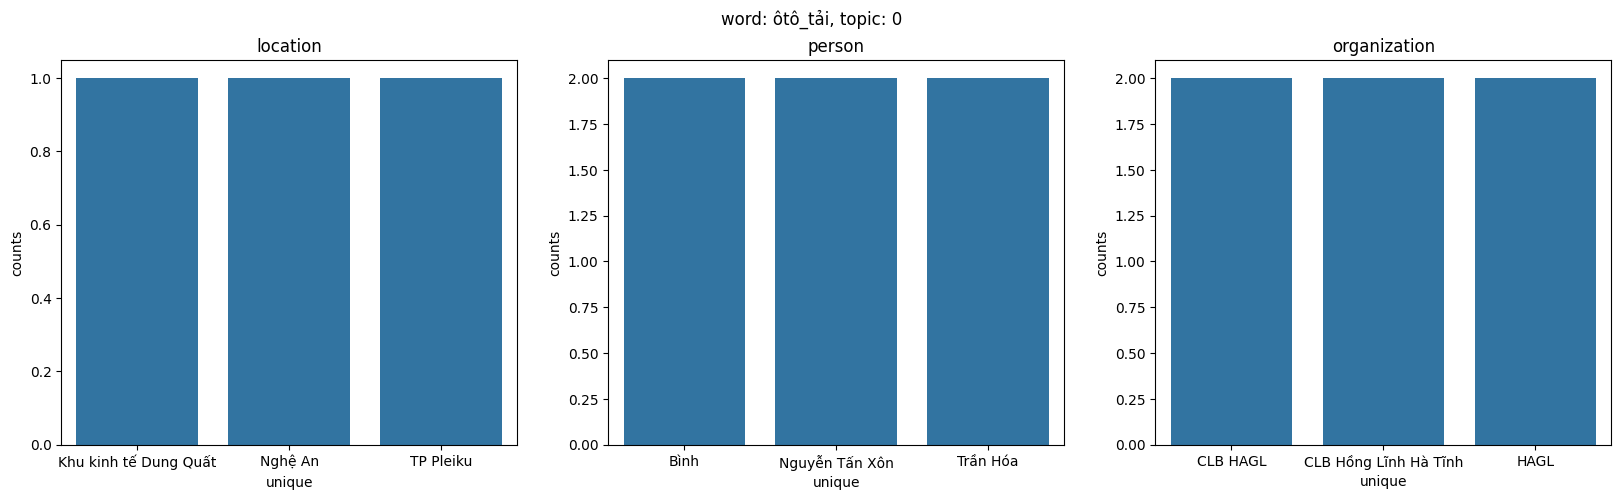

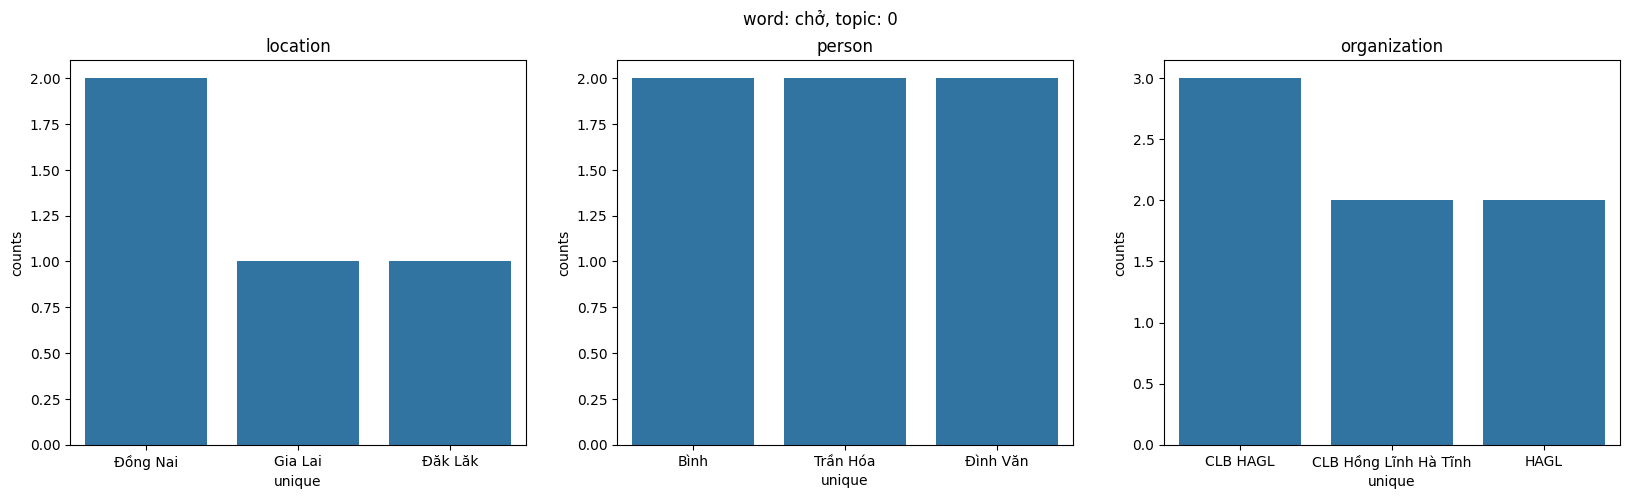

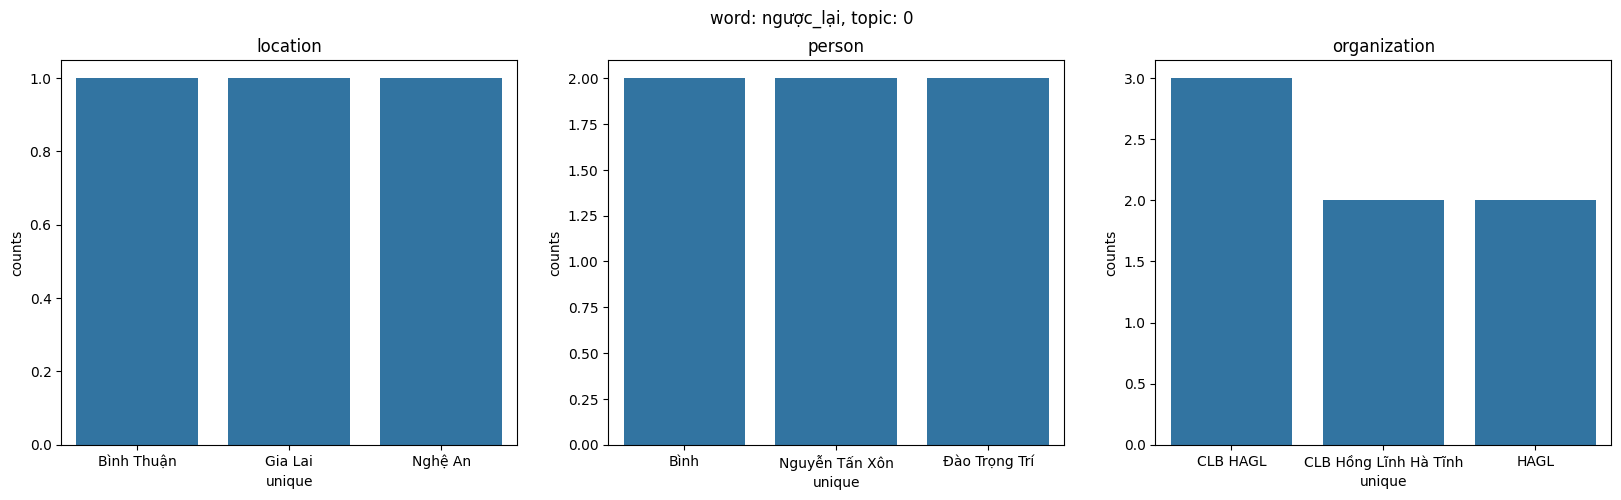

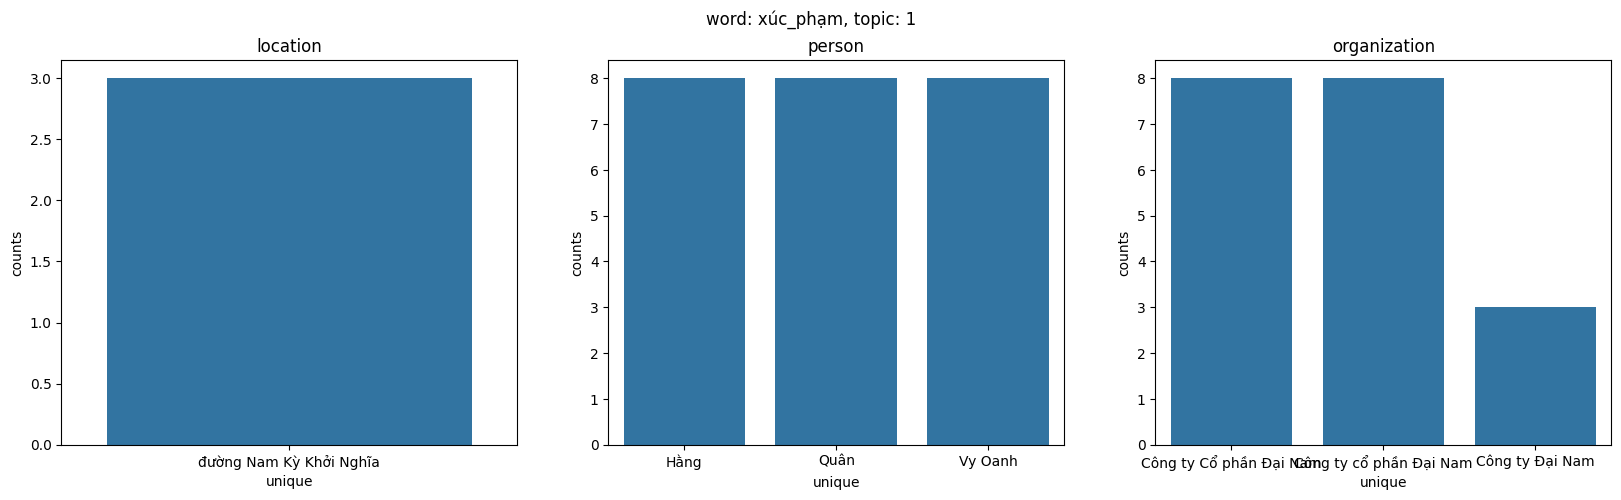

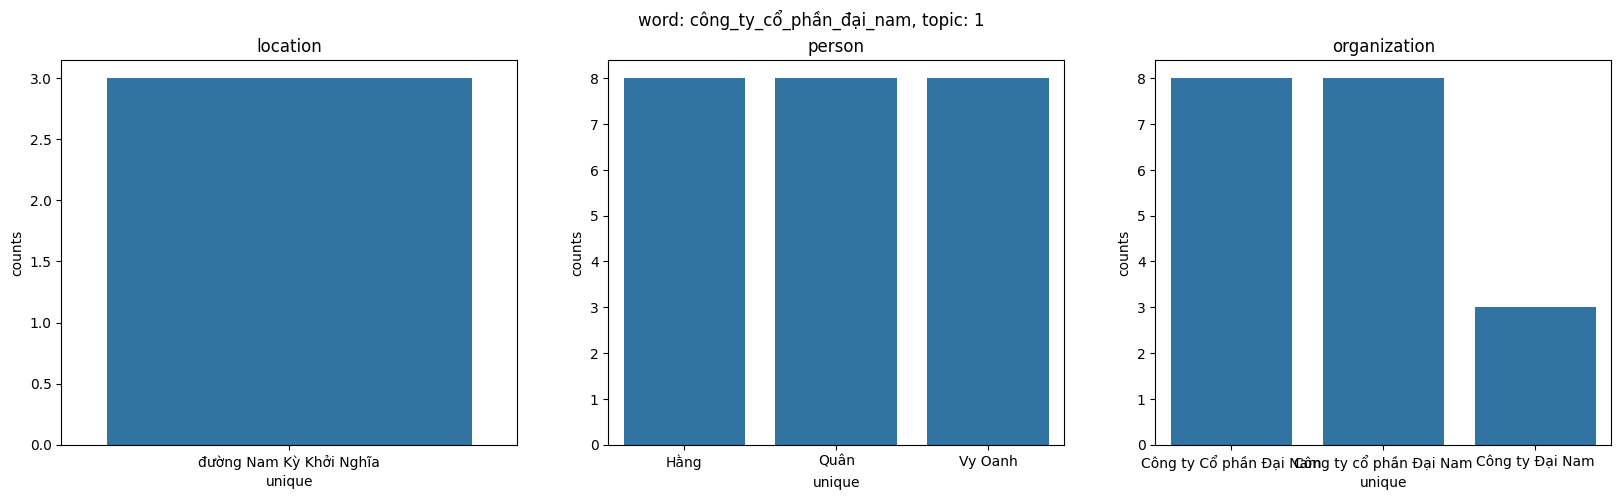

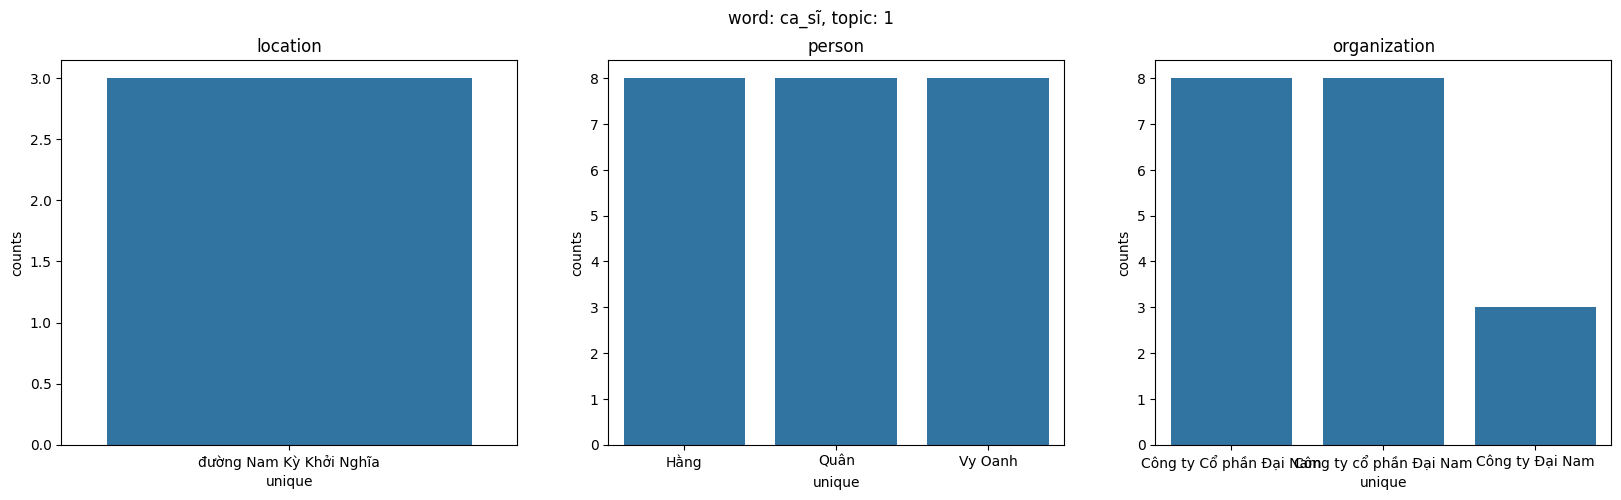

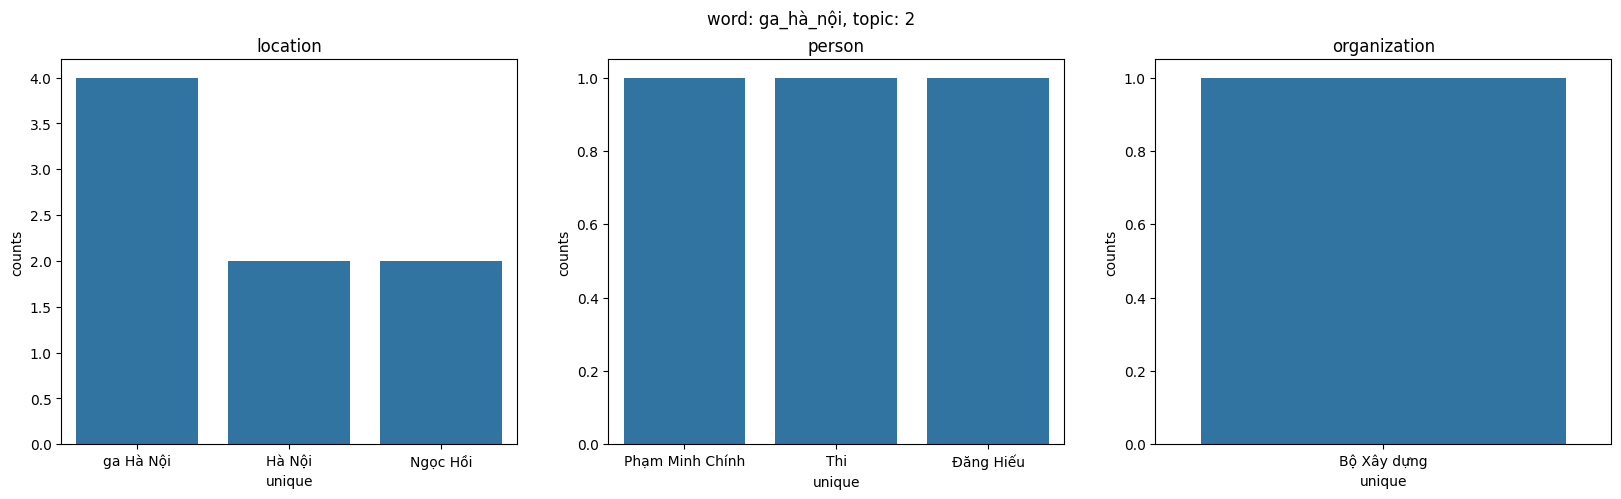

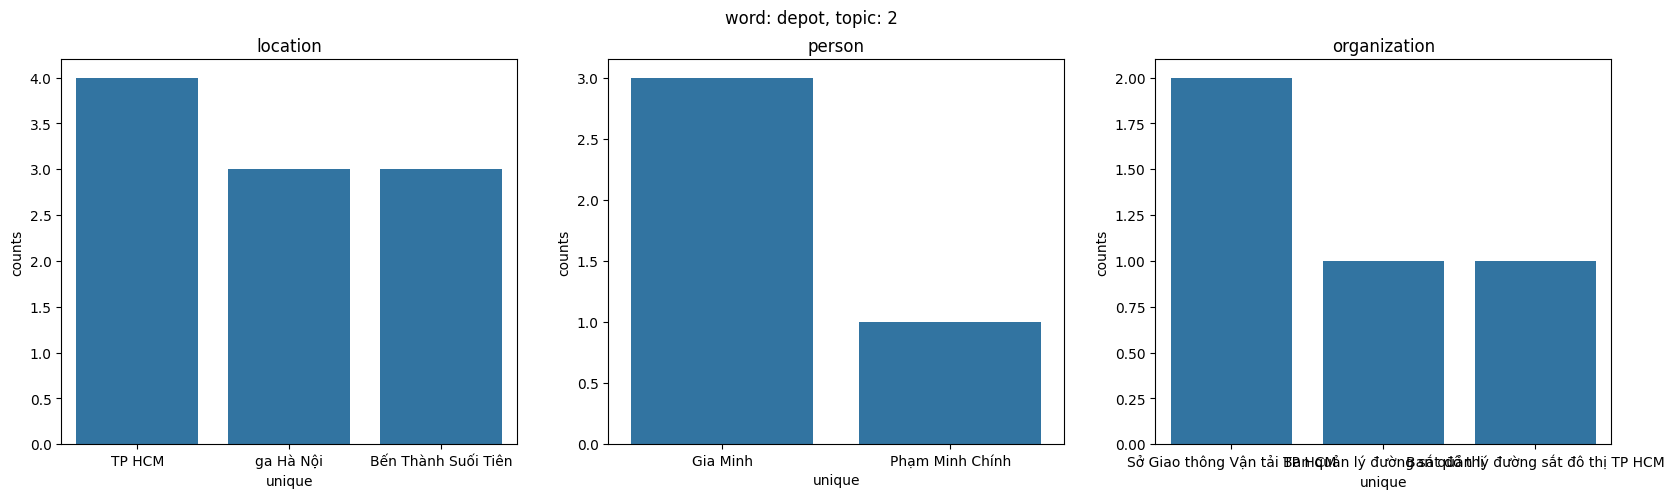

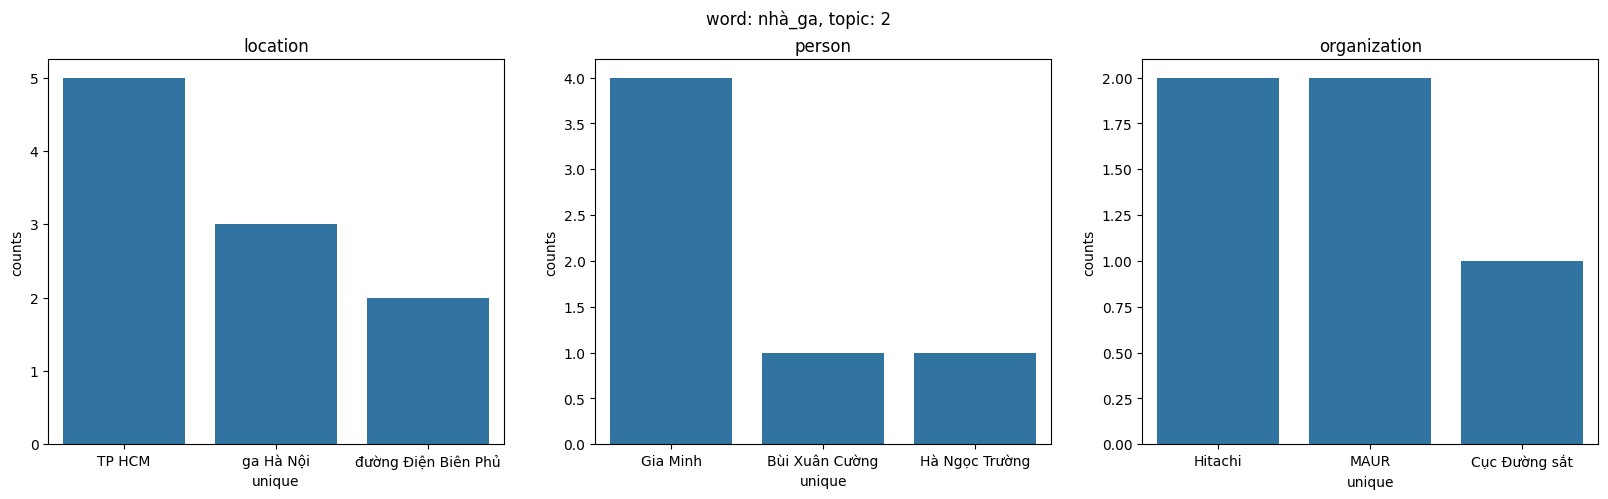

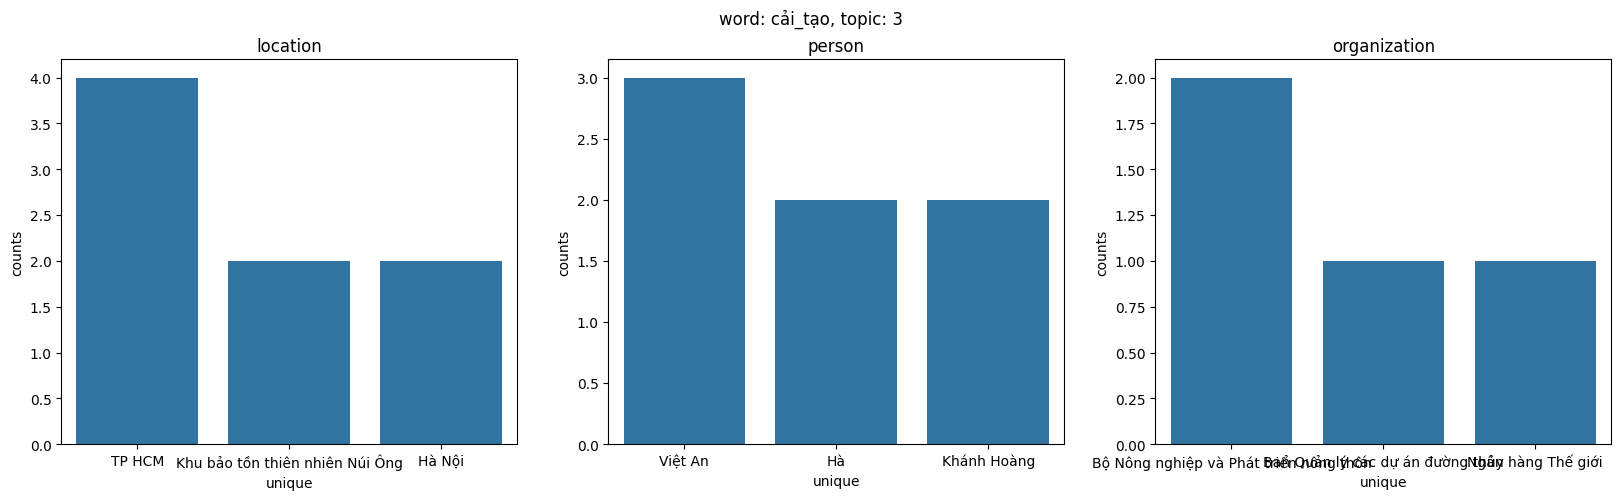

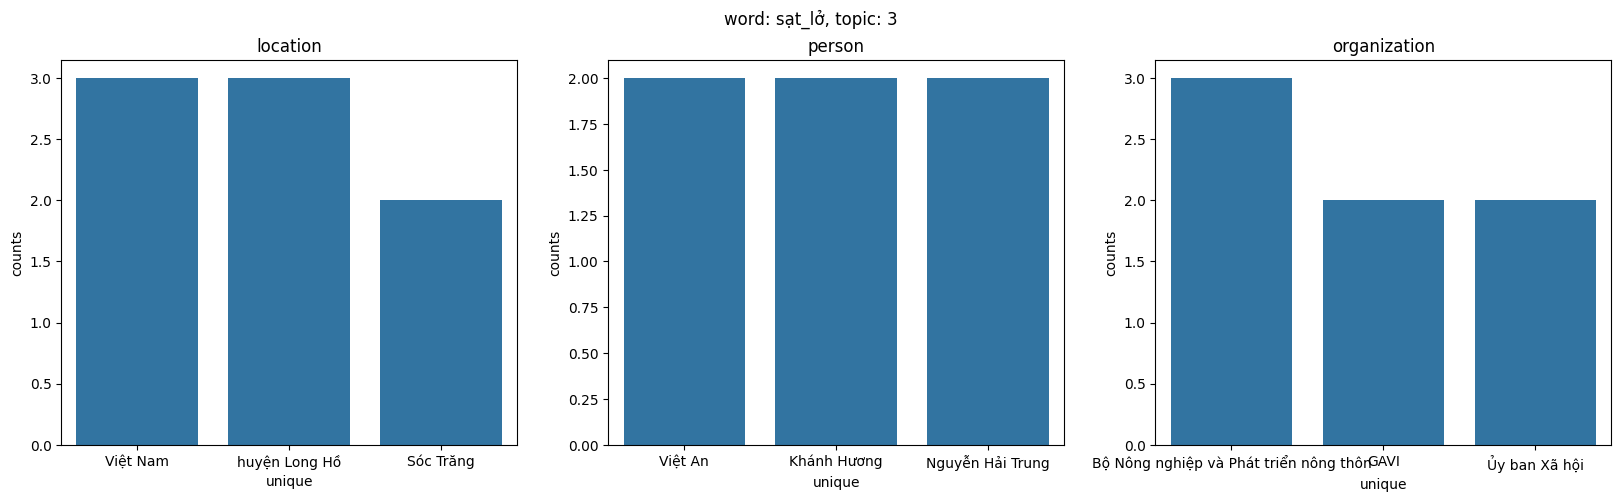

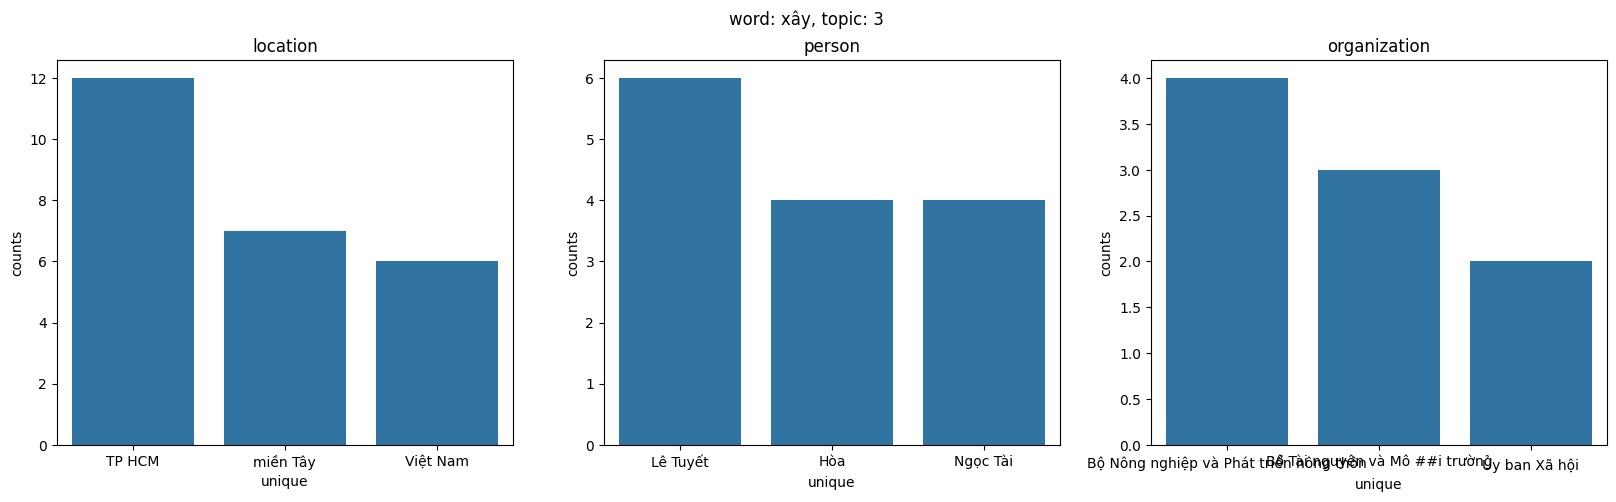

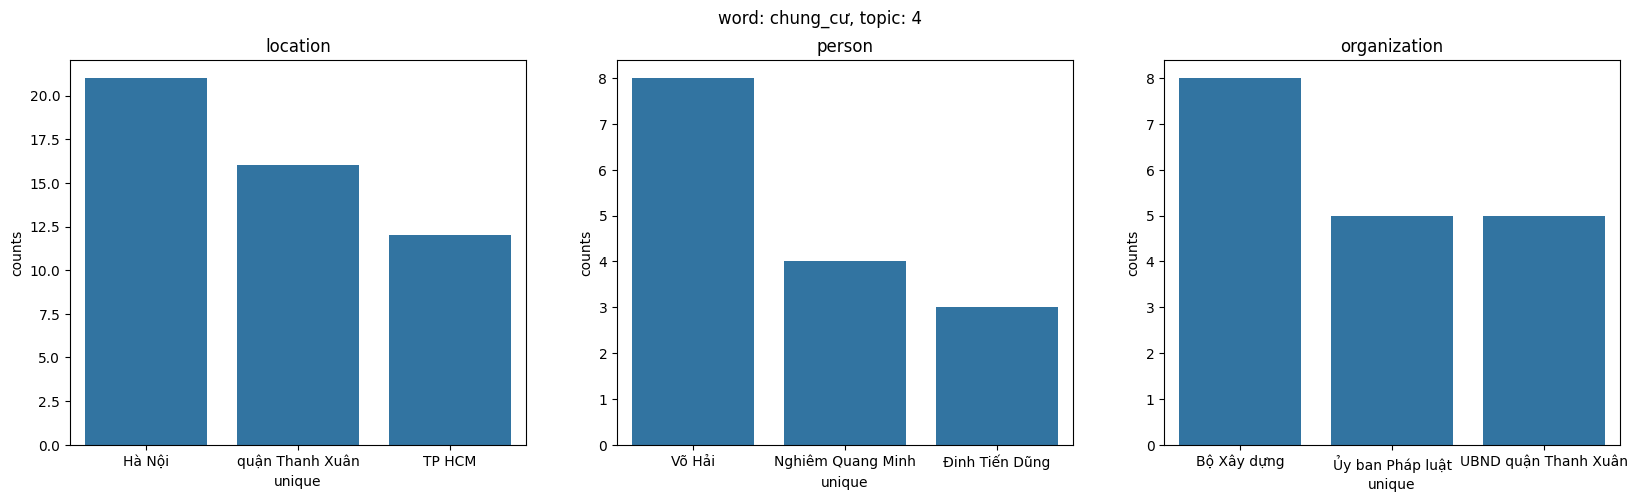

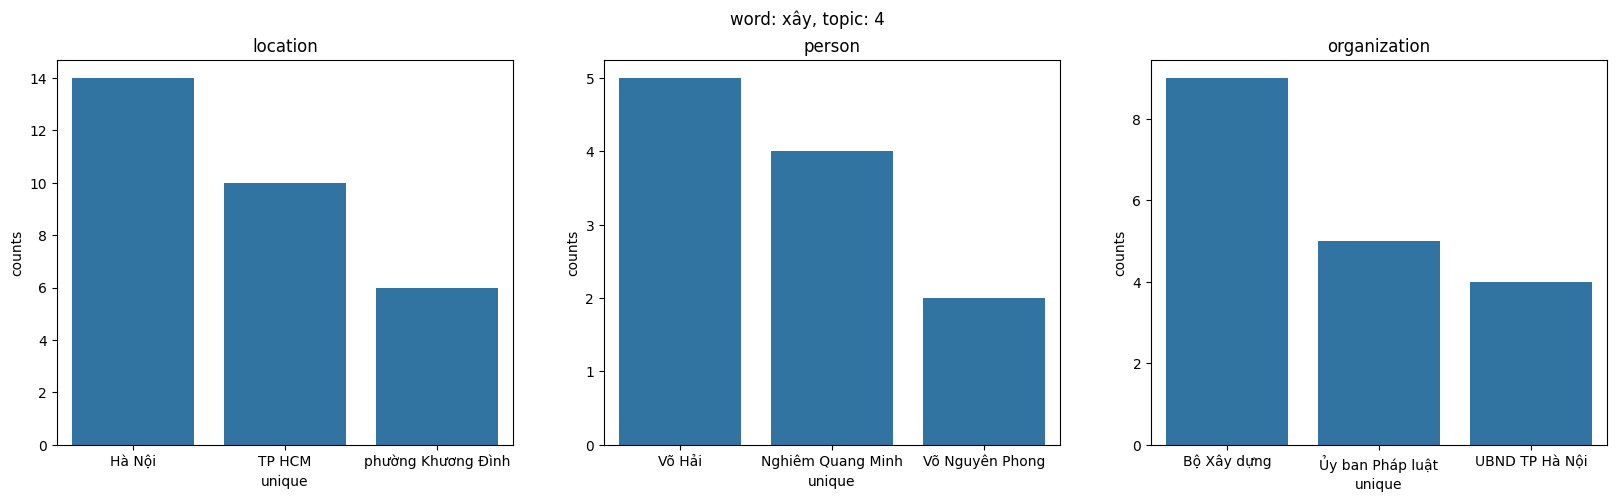

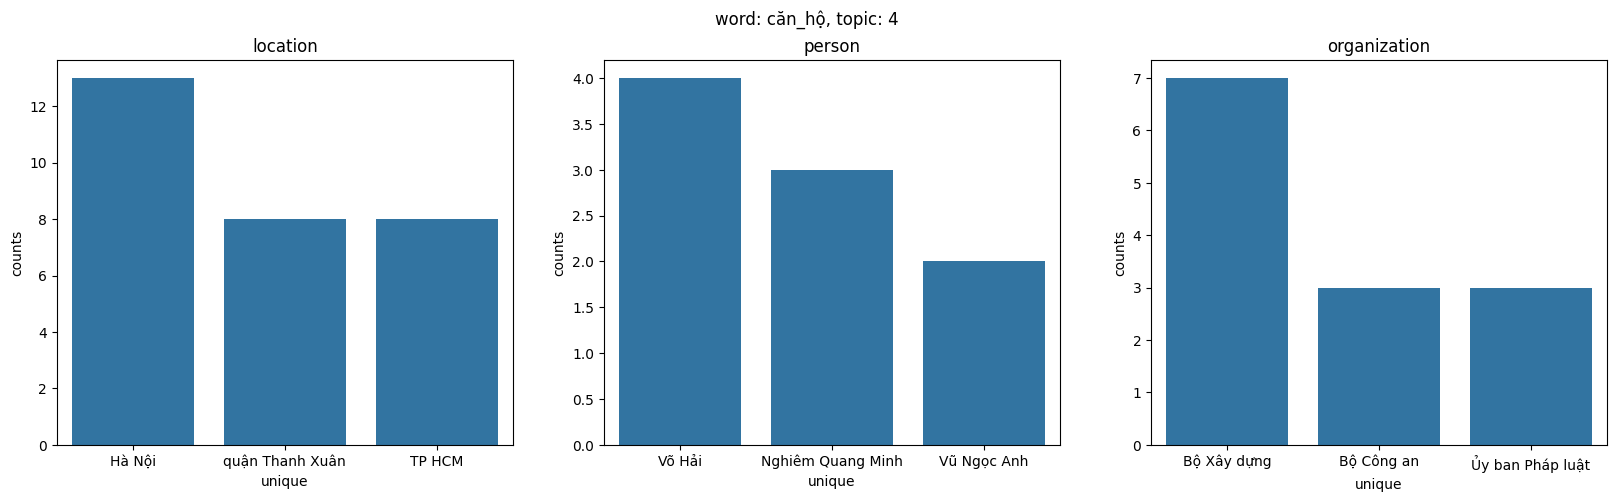

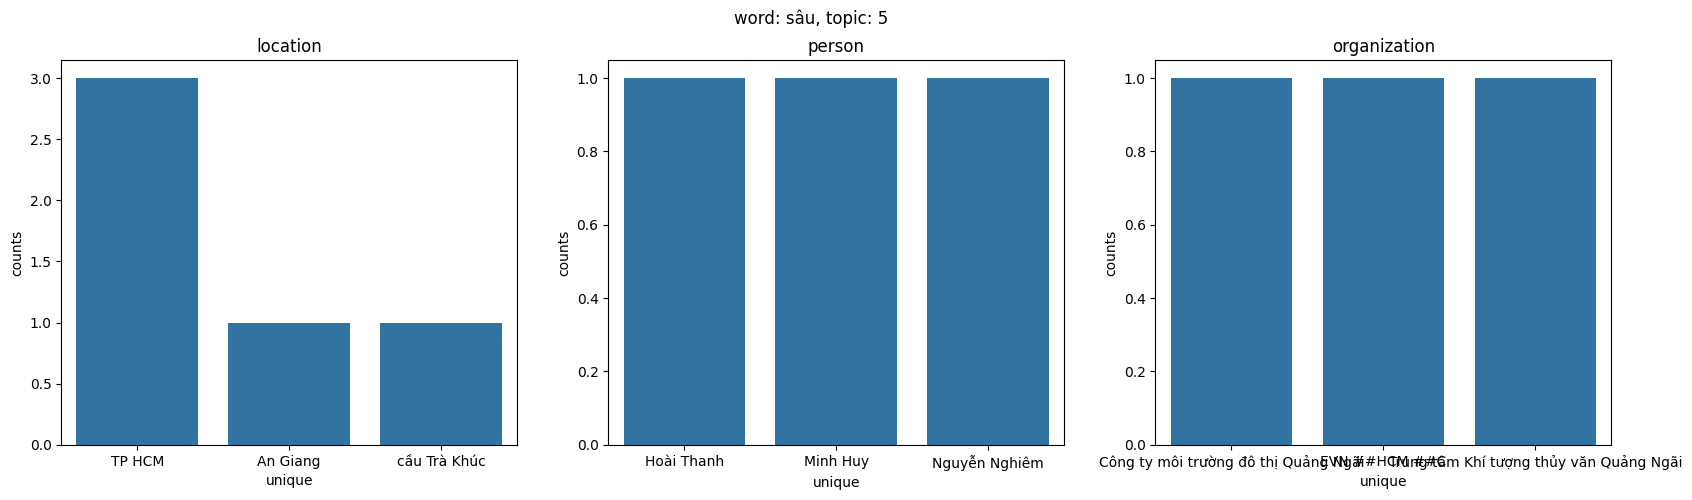

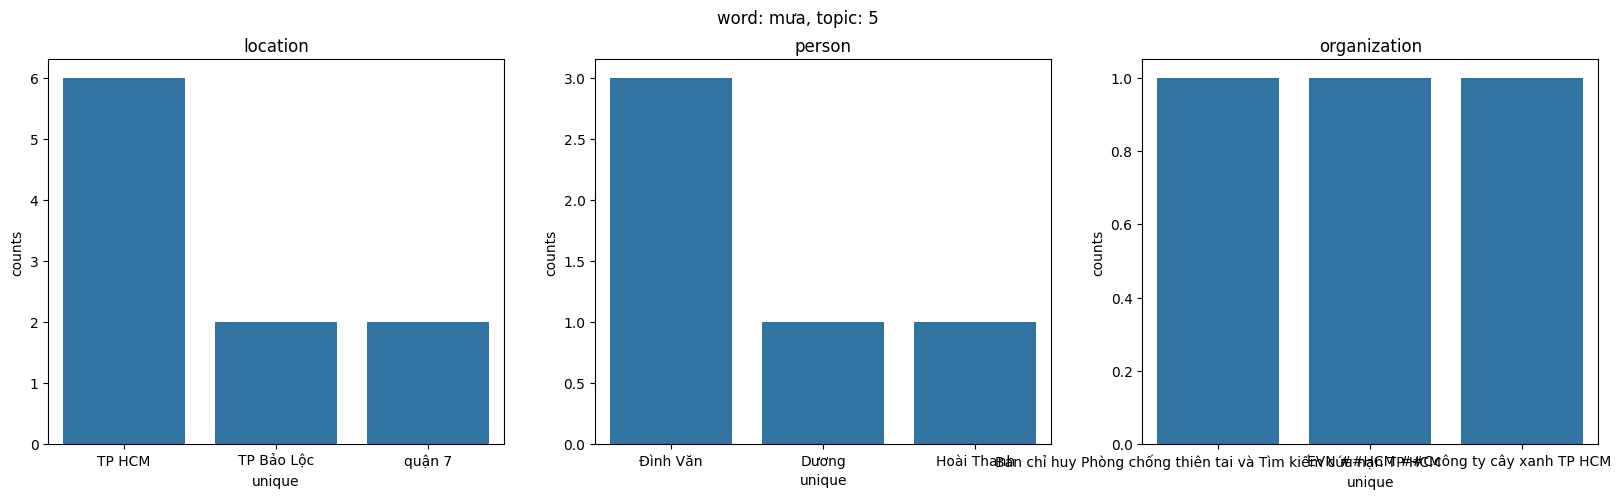

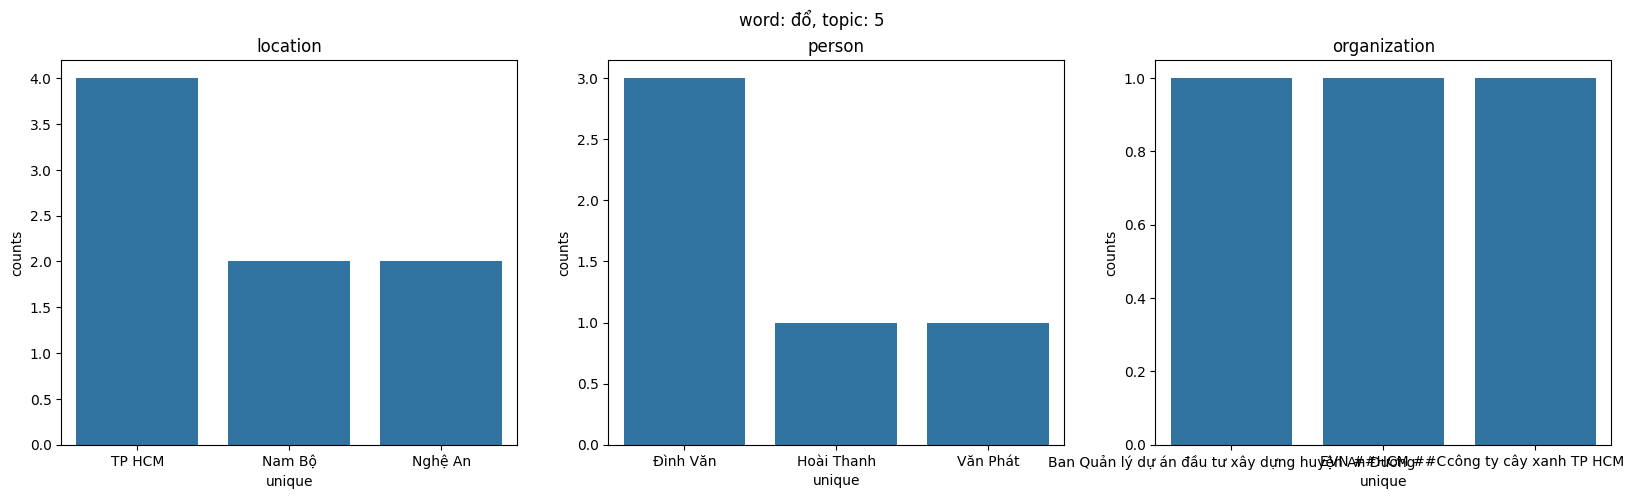

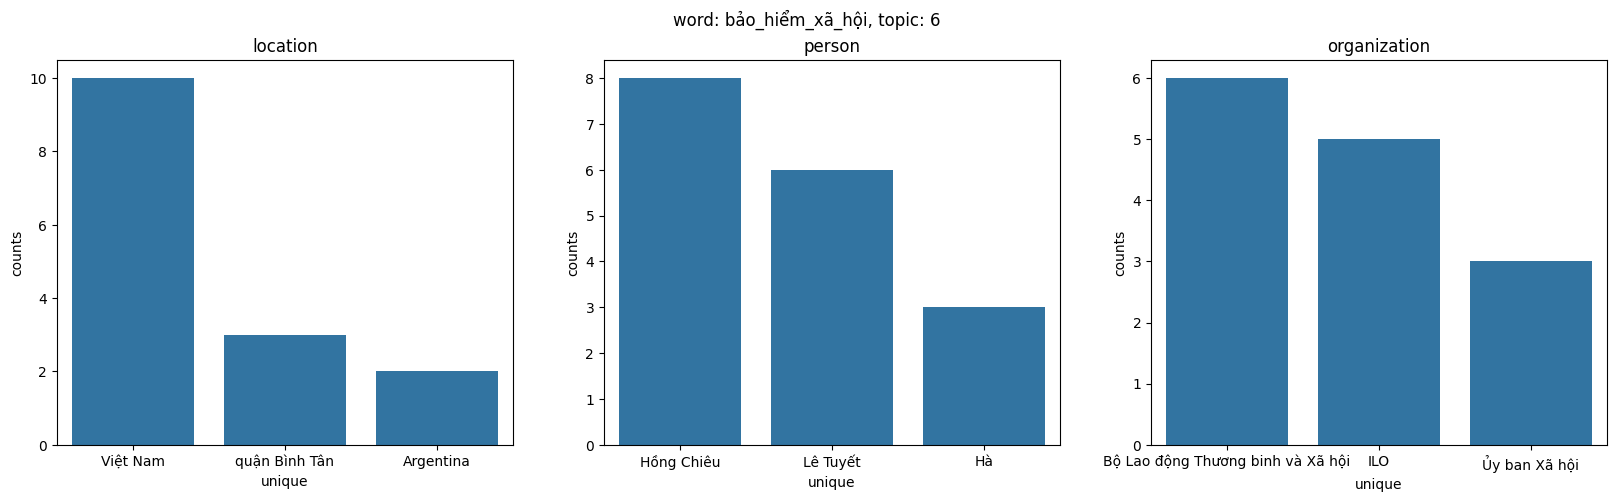

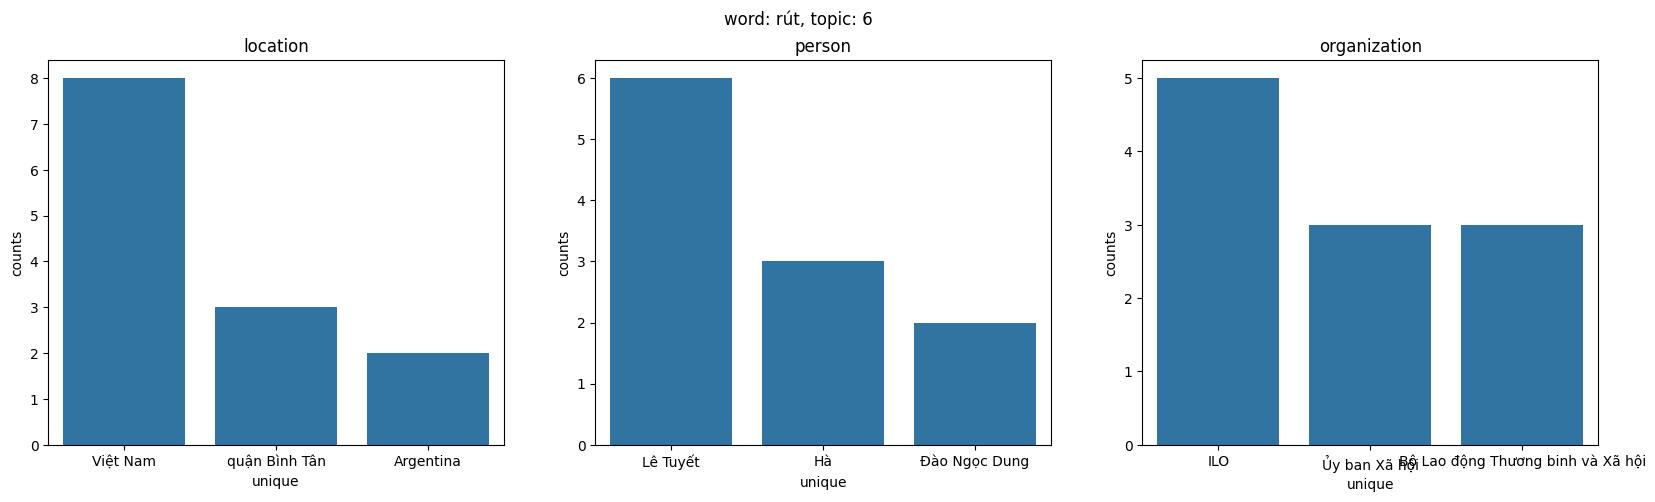

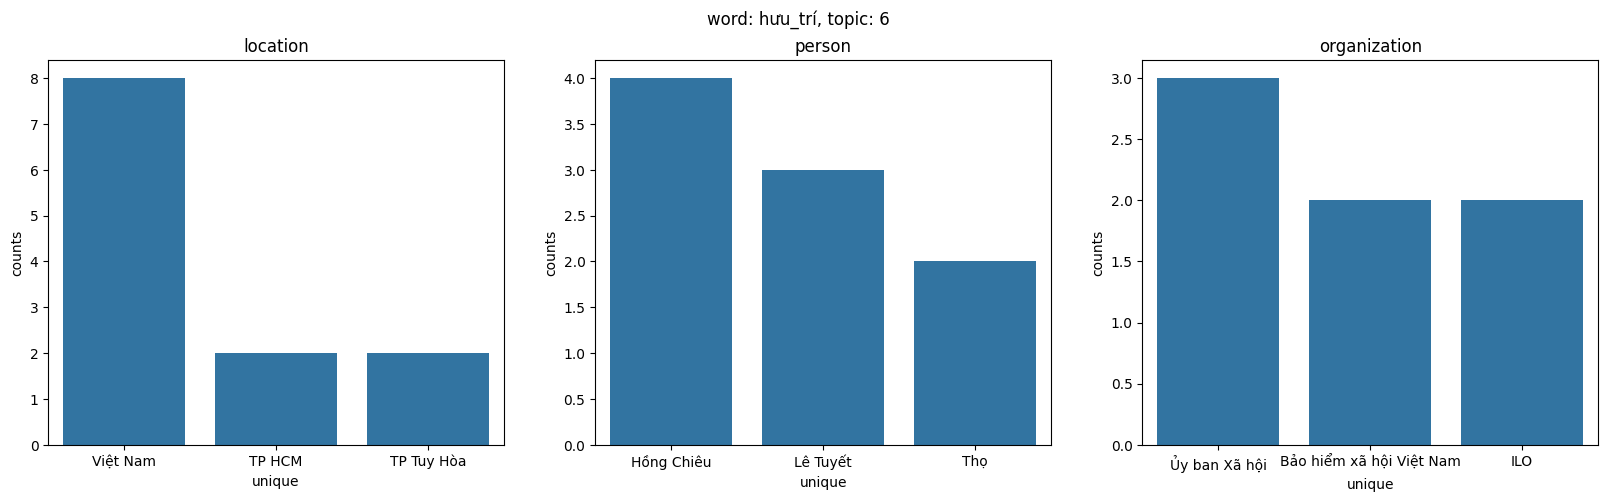

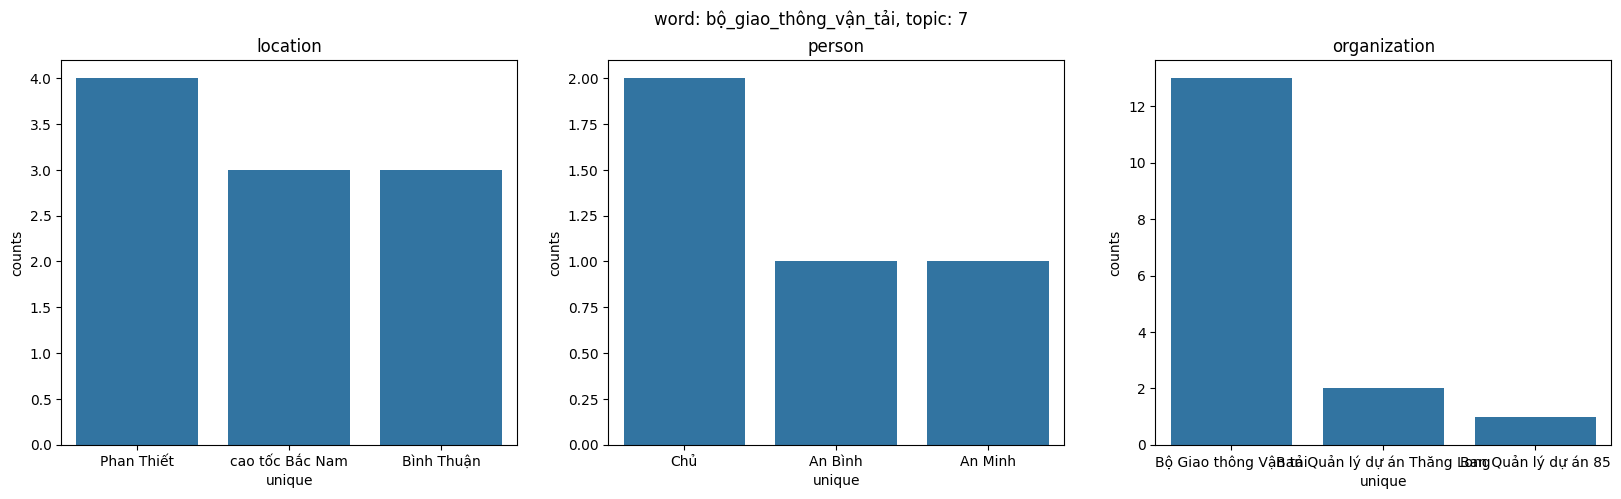

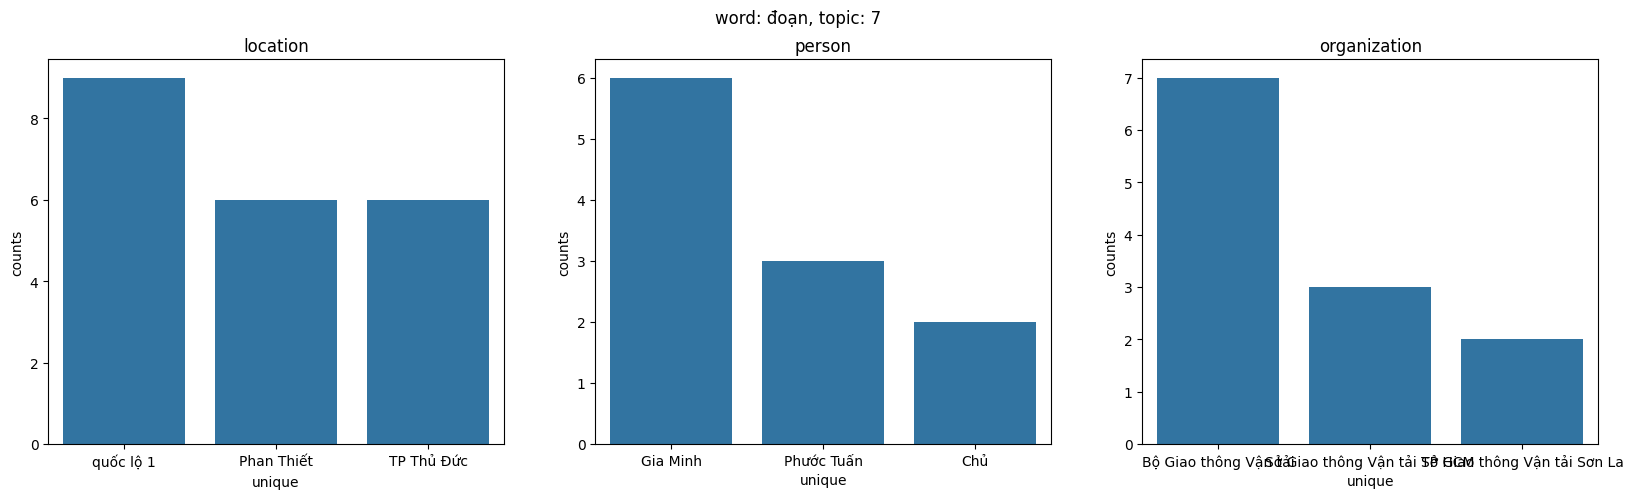

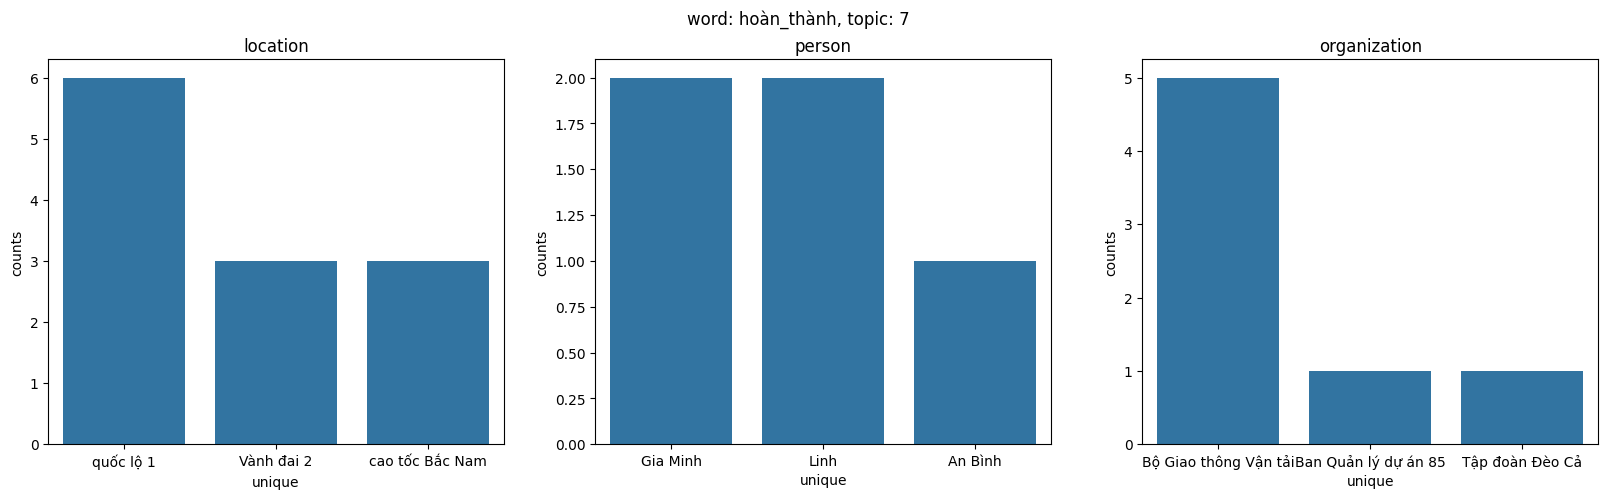

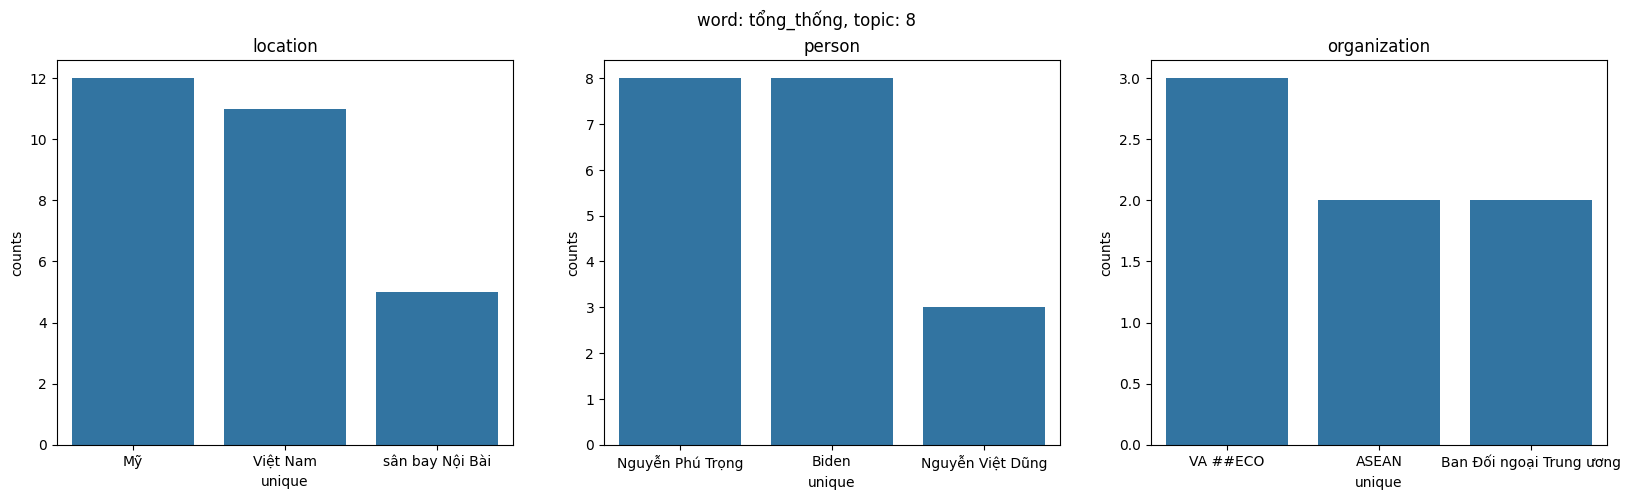

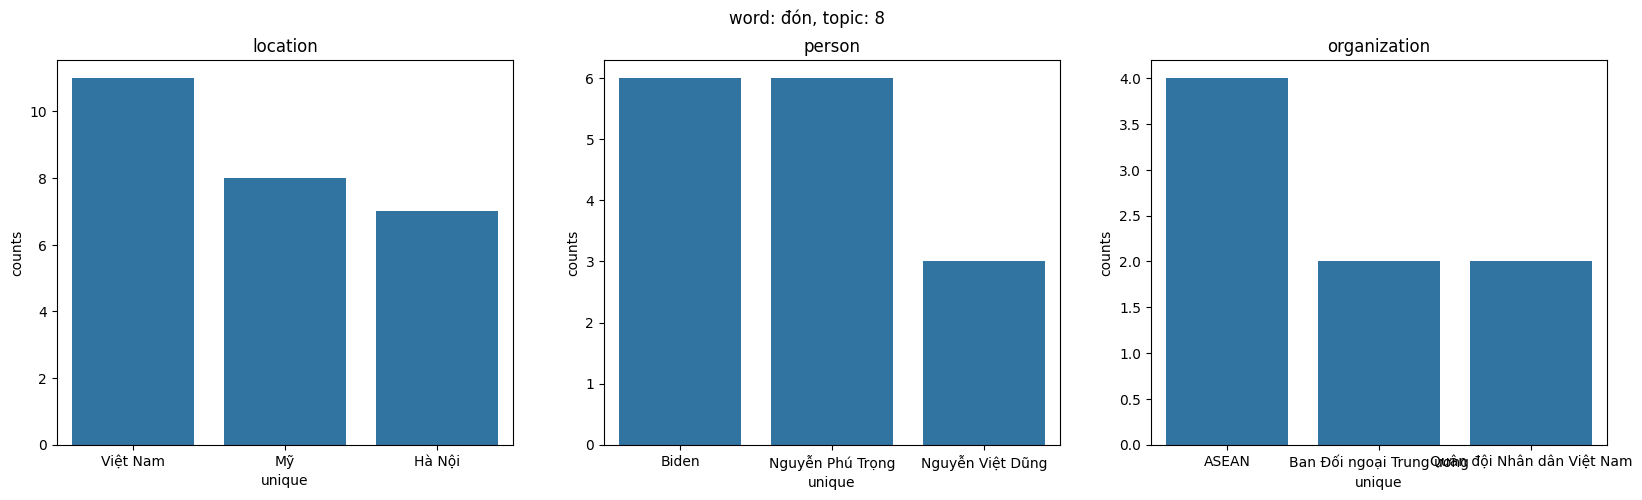

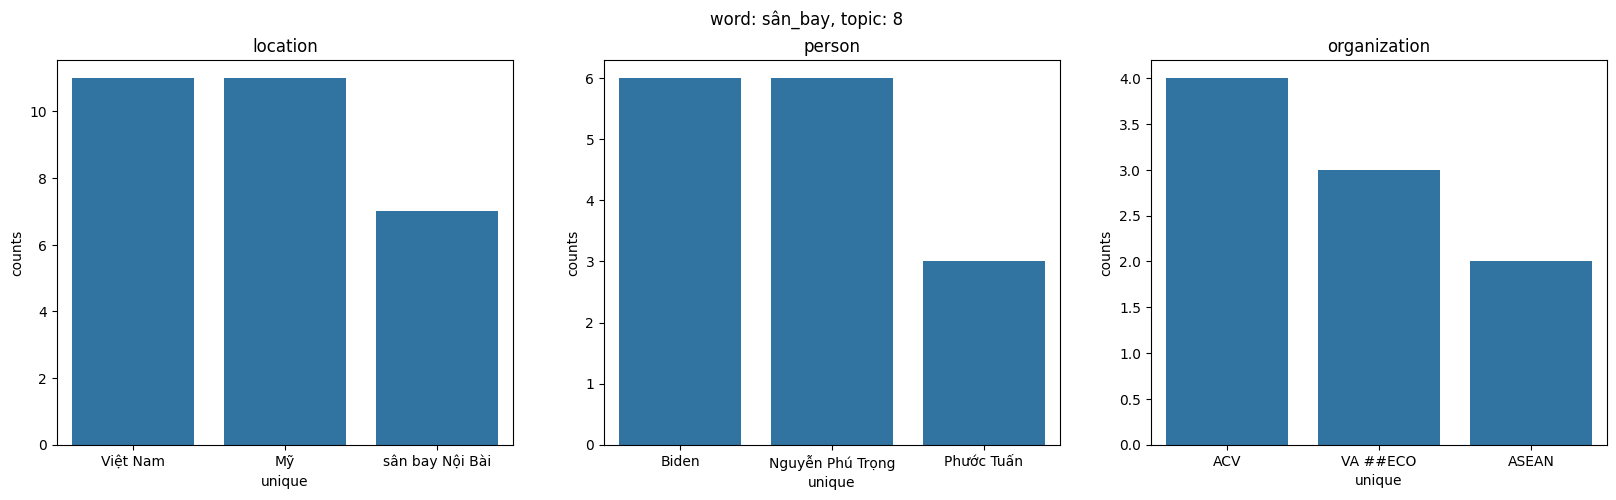

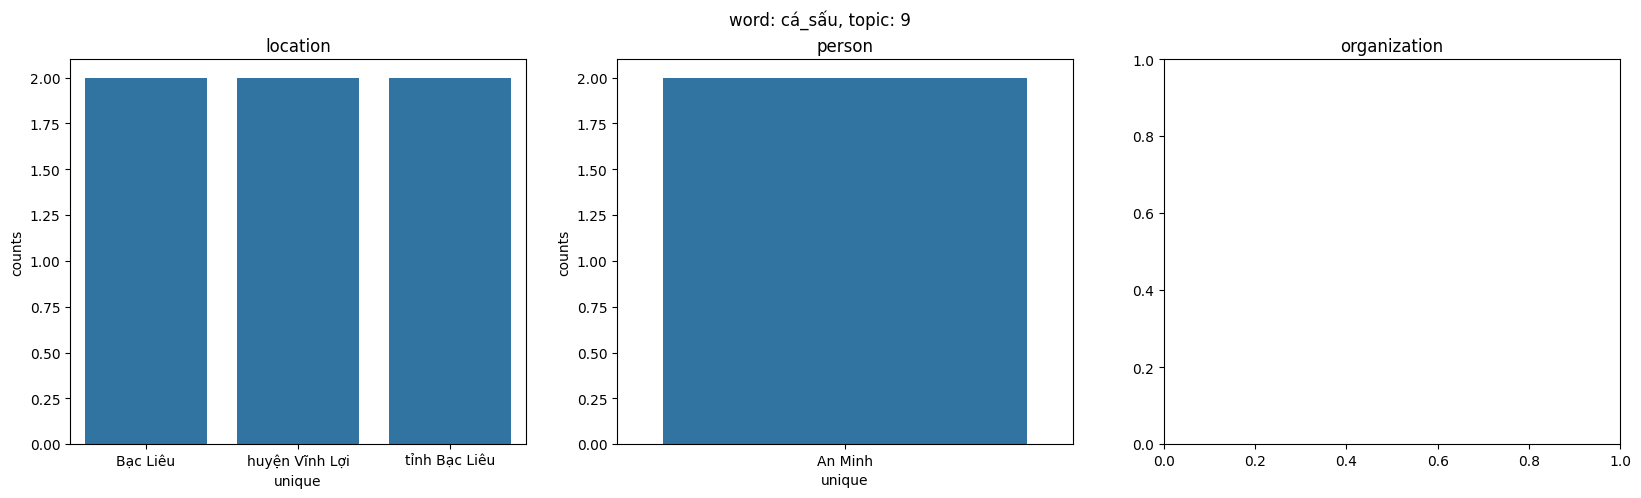

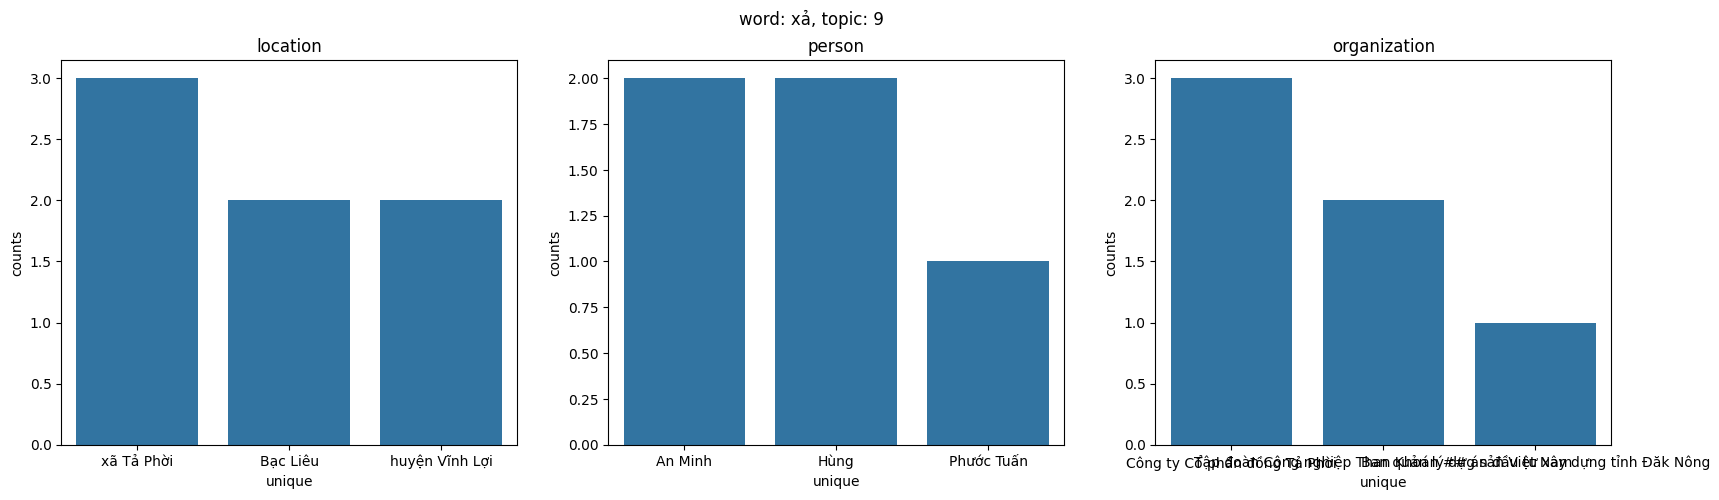

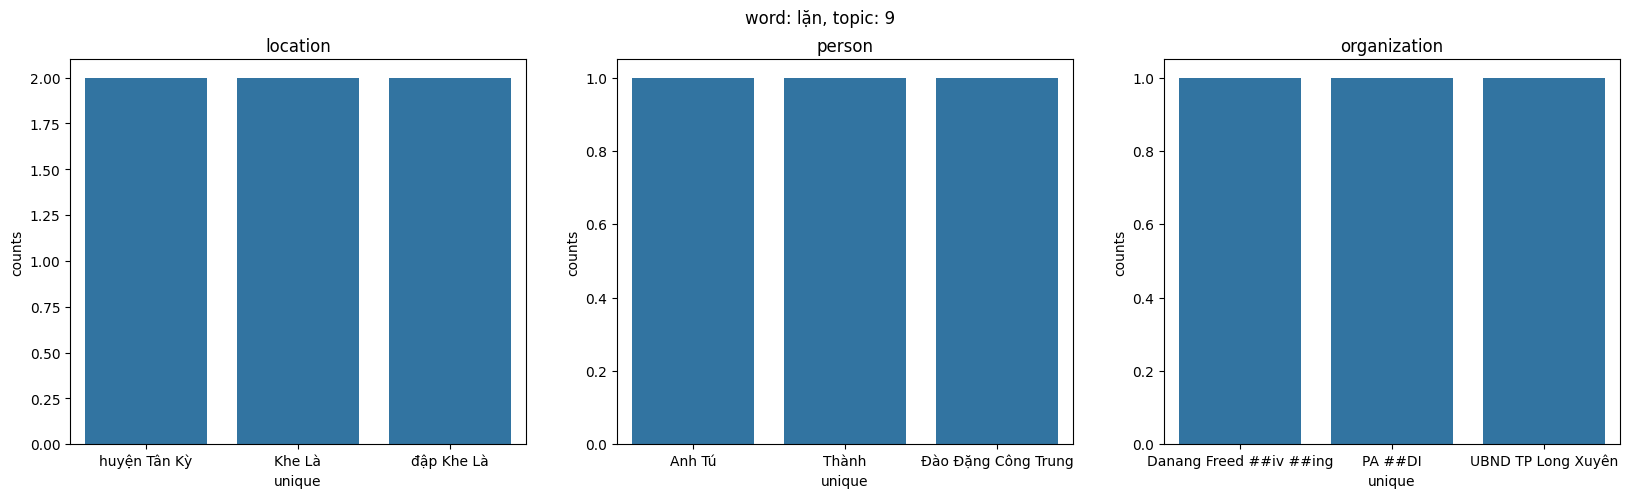

In [16]:
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
t = 0

def get_word_in_time(data, time_start, time_end, topic):
    return data[(data['timestamp'] >= time_start) & (data['timestamp'] <= time_end) & (data['Topic'] == topic)]['Words']

def _get_word(documents,timestamps, nr_bins):
    global_c_tf_idf = normalize(topic_model.c_tf_idf_, axis=1, norm='l1', copy=False)
    all_topics = sorted(list(documents.Topic.unique()))
    all_topics_indices = {topic: index for index, topic in enumerate(all_topics)}
    print(all_topics_indices)
    
    if isinstance(timestamps[0], str):
        infer_datetime_format = True if not datetime_format else False
        documents['timestamp'] = pd.to_datetime(documents['timestamp'], 
                                                infer_datetime_format=infer_datetime_format, 
                                                format=datetime_format)
    
    if nr_bins:
        documents['Bins'] = pd.cut(documents.timestamp, bins=nr_bins)
        documents['timestamp'] = documents.apply(lambda row:row.Bins.left, 1)
        

def getdoc(topic):
    doc = d[d['Topic']==topic]
    return doc

def get_doc_with_timestamp(data,time_start,time_end):
    return data[(data['Timestamp'] >= time_start) & (data['Timestamp'] <= time_end)]

def list_arr_to_arr(arr):
    return [item for sublist in arr for item in sublist]

def unique_count(arr):
    # drop duplicate
    arr = [np.unique(x) for x in arr]
    # list arr to arr
    arr = list_arr_to_arr(arr)
    # count element
    unique, counts = np.unique(arr, return_counts=True)
    df = pd.DataFrame({'unique':unique,'counts':counts})
    df.sort_values(by=['counts'],ascending=False,inplace=True)
    return df

def plot_bar(data,title,word,topic):
    t = len(data)
    fig, ax = plt.subplots(1,t,figsize=(20,5))
    fig.suptitle(f'word: {word}, topic: {topic}')
    for i in range(t):
        sns.barplot(x='unique',y='counts',data=data[i],ax=ax[i])
        ax[i].set_title(title[i])

def find_word_in_doc(word,topic):
    doc_ = getdoc(topic)
    print('sum doc: ',len(doc_))
    doc_word = doc_[doc_['Document'].str.contains(word)]
    print(f'sum doc constains {word}: ',len(doc_word))
    
    arr_location = doc_word['location'].apply(lambda x: ast.literal_eval(x)).to_list()
    df_location = unique_count(arr_location)
    df_location = df_location[0:3]
    # print('--------location--------')
    # print(df_location)
    
    arr_person = doc_word['person'].apply(lambda x: ast.literal_eval(x)).to_list()
    df_person = unique_count(arr_person)
    df_person = df_person[0:3]
    # print('--------person--------')
    # print(df_person)
    
    arr_organization = doc_word['organization'].apply(lambda x: ast.literal_eval(x)).to_list()
    df_organization = unique_count(arr_organization)
    df_organization = df_organization[0:3]
    # print('--------organization--------')
    # print(df_organization)
    # plot
    title = ['location','person','organization']
    data = [df_location,df_person,df_organization]
    plot_bar(data,title,word,topic)
    return doc_word


for i in range(topic_model.nr_topics):
    print('topic: ',i)
    x = topics[i][0:3]
    for word, score in x:
        print(word, score)
        print(len(find_word_in_doc(word,i)))
        print('------------------')

# _get_word(d,timestamp_,10)

In [17]:
topic_distr, topic_token_distr = topic_model.approximate_distribution(docs, calculate_tokens=True)
print('topic_distr: ',len(topic_distr[0])) # n: số lượng chủ đề
print('len of topic_distr: ',len(topic_distr)) # m: số lượng tài liệu hay bài báo
df = topic_model.visualize_approximate_distribution(docs[1], topic_token_distr[1])
df

  0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 1/1 [00:01<00:00,  1.14s/it]

topic_distr:  10
len of topic_distr:  600


,lãnh_đạo,chính_phủ,việt_nam,trao,huân_chương,aurélia,nguyễn_nhân_dịp,tham_dự,phiên,thảo_luận,đại_hội_đồng,liên_hợp,quốc_khóa,khuya,việt_nam,huân_chương,hữu_nghị,nhà_nước,việt_nam,ghi_nhận,aurélia,nguyễn,công_tác,phòng_chống,covid,tiếp_cận,vaccine,dịch_bệnh,aurélia,nguyễn_thủ_tướng,đề_nghị,gavi,việt_nam,tiếp_cận,vaccine,phòng_chống,dịch_bệnh,xây_dựng,chiến_lược,nâng,tiêm_chủng,mở_rộng,tiếp_nhận,chuyển_giao,công_nghệ,vaccine,mrna,mong_muốn,kết_nối,chuyên_gia,tổ_chức,doanh_nghiệp,nước_ngoài,uy_tín,sẵn_sàng,hợp_tác,thuận_lợi,chuyển_giao,công_nghệ,kỹ_năng,sản_xuất,sinh_phẩm,vaccine,đối_tác,việt_nam,giám_đốc,chiến_lược,gavi,vinh_dự,huân_chương,cao_quý,nhà_nước,việt_nam,hợp_tác,chặt_chẽ,hiệu_quả,ngành,y_tế,việt_nam,thông_qua,dự_án,triển_khai,vaccine,chương_trình,tiêm_chủng,mở_rộng,trẻ_em,việt_nam,hoạt_động,tiến,loại_trừ,bệnh,sởi_rubella,tăng_cường,chất_lượng,tiêm_chủng,dây_chuyền,lạnh,bảo_quản,vaccine,aurélia,nguyễn,lãnh_đạo,chiến_lược,chính_sách,lĩnh_vực,vaccine,toàn_cầu,pháp,gốc,việt,cảm_tình,quê_hương,việt_nam,phòng_chống,dịch_bệnh,covid,thường_xuyên,điện_đàm,trao_đổi,thư,lãnh_đạo,việt_nam,covax,gavi,tổ_chức,y_tế,thế_giới,who,liên_minh_sáng_kiến_sẵn_sàng_đối_phó,đại_dịch,cepi,phối_hợp,covax,miễn_phí,việt_nam,triệu,liều,vaccine,phòng_chống,covid,cam_kết,covax,việt_nam,triệu,liều,giai_đoạn,việt_nam,chống,dịch,chống,giặc,aurélia,nguyen,covax,đồng_hành,việt_nam,phòng_chống,dịch,thông_qua,cung_cấp,vaccine,kỹ_thuật,phục_vụ,tiêm_chủng,phối_hợp,tìm_kiếm,vaccine,cơ_chế,chi_phí,thủ_tướng,phạm_minh,new,york,tham_gia,phiên,họp,đại_hội_đồng,liên_hợp_quốc,kết_thúc,hoạt_động,san_francisco,washington,chuyến,công_tác,mỹ,thủ_tướng,kéo_dài,diễn,chuyến,thăm,việt_nam,tổng_thống,mỹ,joe_biden
1_xúc_phạm_công_ty_cổ_phần_đại_nam_ca_sĩ_lê_văn_thành,0.102,0.102,0.102,0.102,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.119,0.119,0.119,0.119,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.109,0.109,0.109,0.109,0.102,0.214,0.335,0.465,0.363,0.250,0.129,0.000,0.000,0.000,0.100,0.100,0.100,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.100,0.100,0.100,0.100,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.108,0.108,0.108,0.108,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
2_ga_hà_nội_depot_nhà_ga_hoàn_thành,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.104,0.104,0.104,0.104,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,

In [18]:
print(topics_over_time.shape)
data_topic_over_time = topics_over_time
time_start = "2023-07-28"
time_end = "2023-08-16"
def get_doc_with_timestamp(data,time_start,time_end):
    return data[(data['Timestamp'] >= time_start) & (data['Timestamp'] <= time_end)]
data_topic_over_time = get_doc_with_timestamp(data_topic_over_time,time_start,time_end)
data_topic_over_time.head(20)

(54, 5)


,Topic,Words,Frequency,Timestamp,Name
2,1,"iot_việt_nam, mm_iot, iot_việt, viễn_thông, vc...",1,2023-07-28 09:36:00,1_xúc_phạm_công_ty_cổ_phần_đại_nam_ca_sĩ...
3,8,"thủ_đô_hà_nội, hà_nội, mật_độ, định_hướng, hóa",1,2023-07-28 09:36:00,8_tổng_thống_đón_sân_bay_quốc_phòng
4,0,"ôtô_tải, nguyễn_tấn_xôn, chở, ngược_lại, ôtô_con",16,2023-08-06 12:00:00,0_ôtô_tải_chở_ngược_lại_tài_xế
5,1,"văn_hóa, thủy_sản, việt_nam, phát_triển, xuất_...",31,2023-08-06 12:00:00,1_xúc_phạm_công_ty_cổ_phần_đại_nam_ca_sĩ...
6,2,"ga_hà_nội, depot, hoàn_thành, xây, khởi_công",7,2023-08-06 12:00:00,2_ga_hà_nội_depot_nhà_ga_hoàn_thành
7,3,"thùy_vân, cảng_trần_đề, hoàn_thành, đồng_bằng_...",19,2023-08-06 12:00:00,3_cải_tạo_sạt_lở_xây_khu_vực
8,4,"công_an_quận_ba_đình, sập, bốc, nổ, rung_chuyển",1,2023-08-06 12:00:00,4_chung_cư_xây_căn_hộ_khương_đình
9,5,"công_ty_lưới_điện_cao_thế_tp_hà_nội, khám_nghi...",11,2023-08-06 12:00:00,5_sâu_mưa_đổ_thủy
10,6,"tổng_liên_đoàn_lao_động_việt_nam, lương, cắt_g...",8,2023-08-06 12:00:00,6_bảo_hiểm_xã_hội_rút_hưu_trí_cắt_giảm
11,7,"đoạn, hoàn_thành, bộ_giao_thông_vận_tải, cao_t...",12,2023-08-06 12:00:00,7_bộ_giao_thông_vận_tải_đoạn_hoàn_thành_...
